**Data Collection**

- The problem statement that I have chosen to work towards is: Which drugs in the Medicare Part D program can be classified as outliers based on their average cost per dosage unit to insurance companies?

- The goal is to flag drugs with unusually high spending that may indicate abnormal pricing by manufacturers.

- Given my background in healthcare analytics, I understand how powerful data-driven insights can be in influencing business decisions. Identifying these outlier drugs is critical because it enables insurance providers and policymakers to flag potentially overpriced pharmaceuticals, leading to more informed financial decisions/stategy.

**Determining the Population for My Project**

The population I wish to study for my outlier prediction analysis is all
unique drug products (which includes brand name, generic name, manufacturer) and cost spending on them, which is represented by their annual spending, dosage units, claims, beneficiary counts, and calculated spending metrics for each year.



**Defining Variables from my Dataset:**

The Independent variables that are of interest to me are:
- Brand Name (Brnd_Name)
- Generic Name (Gnrc_Name)
- Manufacturer Name (Mftr_Name)
- Average Spending Per Dosage Unit Per Year(Avg_Spnd_Per_Dsg_Unt_Wghtd_2019)
- Total Beneficiaries (Tot_Benes_2019)
- Total Dosage Units Per Year (Tot_Dsg_Unts_2019)
- Total Spending Per Year (Tot_Spndng_2019)

The Dependent variables would be:
- Future Average Spending Per Dosage Unit Per Year
(Avg_Spnd_Per_Dsg_Unt_Wghtd_2026)
- Future Outlier Status (Outlier_Flag_2026)

Counfounding Variables - They are some outside variables that affect the prediction of the dependent variable. They can potentially bias the prediction and distort the relationship between the prediction and the actual observed outcome

There are two confounding variables that I think can affect my prediction on the dataset that I am working on:
- Indication-based Pricing
  - Some drugs often have high prices as they are for rare diseases and they have a good chance to be classified as an outlier. This is not solving my goal, which is to flag unusual spending.
  - To control it:
    - Before running the prediction, I will try to pull the indication data for the drug and classify it as a rare disease or not through a flag
    - The rare diseases drugs will be grouped together, and the outlier analysis will be run separately for them
- Policy Changes
  - A policy change-like new government subsidies, price caps, or changes in reimbursement rules-can directly affect the cost or utilization of a drug. This means:
    - A drug might be predicated as a spending outlier, but a subsidy can be applied, its cost drops and it's no longer an outlier
    - Conversely, a drug that was predicted to be within the range of the company could become an outlier if a subsidy is removed or a new regulation increases its price
  - This confounder cannot be dealt with the data available. If I had the resources, I would obtain data from the drug administration on any potential policy changes and factor that in the prediction analysis








**My Hypothesis:**

-	As the number of total beneficiaries increases over time, the average spending per dosage unit per year also increases in the future.
- And if the average spending is significantly higher or lower than the other drug-manufacturers, it will be classified as an outlier.

**Plan for Data Collection:**

-	I will obtain the Medicare Part D Drug Spending dataset from the US Government’s Open Data Repository (https:/ /www.data.gov). They are publicly available and are available in the CSV format.
-	Each row is going to be unique at a drug-manufacturer-year level. So, I will use the stratified random sampling method wherein I would pick different groups based on the level I listed above.
-	I am going to directly download the dataset in the CSV format from the US Government’s Open Data Repository (https:/ /www.data.gov).


**About the Dataset I chose:**

-	This dataset interested me because of my background in healthcare analytics. I have worked on advanced patient data analytics and experienced how data-driven insights can influence business decisions in the pharmaceutical sector. Working on a real world health insurance dataset gives me an opportunity to analyze the variables driving the outliers and predict the drugs which would be in outlier bucket in the future.
-	The dataset contains annual Medicare Part D drug spending details for each drug and manufacturer combination. It includes brand and generic names, manufacturer, total spending, the number of dosage units dispensed, number of claims, number of beneficiaries, average spending per dosage unit, spending growth rates, and flags for unusually high spending (outliers).
-	I downloaded the dataset from https://www.data.gov, the official open data portal of the U.S. government.
-	The dataset is from 2023; it covers the drug spending metrics from 2019 through 2023.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MedicarePartD_Spending_by_Drug_Dataset.csv to MedicarePartD_Spending_by_Drug_Dataset (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('MedicarePartD_Spending_by_Drug_Dataset.csv')
print(df.head())

                       Brnd_Name             Gnrc_Name  Tot_Mftr  \
0       1st Tier Unifine Pentips  Pen Needle, Diabetic         1   
1       1st Tier Unifine Pentips  Pen Needle, Diabetic         1   
2  1st Tier Unifine Pentips Plus  Pen Needle, Diabetic         1   
3  1st Tier Unifine Pentips Plus  Pen Needle, Diabetic         1   
4                       Abacavir      Abacavir Sulfate         5   

         Mftr_Name  Tot_Spndng_2019  Tot_Dsg_Unts_2019  Tot_Clms_2019  \
0          Overall        139201.68           642471.0         5392.0   
1  Owen Mumford Us        139201.68           642471.0         5392.0   
2          Overall        343031.42          1830596.0        14581.0   
3  Owen Mumford Us        343031.42          1830596.0        14581.0   
4          Overall      10110328.45          3316293.0        42629.0   

   Tot_Benes_2019  Avg_Spnd_Per_Dsg_Unt_Wghtd_2019  Avg_Spnd_Per_Clm_2019  \
0          1878.0                         0.216788              25.816335  

**Data Pre-Processing**

In [ ]:
#Preliminary Exploration

print(f"No. of rows: {df.shape[0]}")
print(f"No. of columns: {df.shape[1]}")

print(f"\n{df.dtypes}")

print(f"\nTotal columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print("\nUnique elements Per Column:\n")
for col in df.columns:
  n_unq = df[col].nunique()
  print(f"{col}: {n_unq}")

print("\nDescriptive Statistics")
df.describe()

No. of rows: 14309
No. of columns: 46

Brnd_Name                           object
Gnrc_Name                           object
Tot_Mftr                             int64
Mftr_Name                           object
Tot_Spndng_2019                    float64
Tot_Dsg_Unts_2019                  float64
Tot_Clms_2019                      float64
Tot_Benes_2019                     float64
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019    float64
Avg_Spnd_Per_Clm_2019              float64
Avg_Spnd_Per_Bene_2019             float64
Outlier_Flag_2019                  float64
Tot_Spndng_2020                    float64
Tot_Dsg_Unts_2020                  float64
Tot_Clms_2020                      float64
Tot_Benes_2020                     float64
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020    float64
Avg_Spnd_Per_Clm_2020              float64
Avg_Spnd_Per_Bene_2020             float64
Outlier_Flag_2020                  float64
Tot_Spndng_2021                    float64
Tot_Dsg_Unts_2021                  float64
Tot_Clms_2021  

,Tot_Mftr,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Tot_Benes_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,Avg_Spnd_Per_Bene_2019,Outlier_Flag_2019,Tot_Spndng_2020,...,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Tot_Benes_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Avg_Spnd_Per_Bene_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
count,14309.000000,1.010400e+04,1.010400e+04,1.010400e+04,1.001700e+04,10104.000000,10104.000000,9.910000e+03,10102.000000,1.105100e+04,...,1.430900e+04,1.430900e+04,1.430900e+04,1.354700e+04,14309.000000,14309.000000,1.354700e+04,14296.000000,12983.000000,13148.000000
mean,1.497100,3.541991e+07,2.098258e+07,2.846339e+05,9.138128e+04,176.391369,1558.068970,7.745980e+03,0.076322,3.553602e+07,...,3.856657e+07,1.742970e+07,2.261006e+05,7.869280e+04,292.649878,2138.820677,1.004324e+04,0.130946,0.042379,0.004134
std,2.434423,2.008140e+08,1.214528e+08,1.512036e+06,4.219343e+05,1494.579906,7147.476234,4.548672e+04,0.265525,2.289451e+08,...,3.442068e+08,1.261185e+08,1.453424e+06,4.201443e+05,3415.529529,9723.759365,5.196628e+04,0.337353,1.095419,0.233424
min,1.000000,5.716000e+01,7.000000e-01,1.100000e+01,1.100000e+01,0.000232,0.037375,1.132564e-01,0.000000,5.711000e+01,...,3.118000e+01,3.500000e+00,1.100000e+01,1.100000e+01,0.003701,1.101754,1.777857e+00,0.000000,-0.968500,-0.968500
25%,1.000000,1.142687e+05,3.421600e+04,7.530000e+02,3.080000e+02,0.462640,28.863514,7.143628e+01,0.000000,9.645127e+04,...,4.260451e+04,1.097600e+04,2.470000e+02,1.380000e+02,0.488697,30.790281,7.163121e+01,0.000000,-0.083141,-0.052694
50%,1.000000,1.467648e+06,3.623199e+05,7.167000e+03,2.473000e+03,1.973185,103.638066,2.575316e+02,0.000000,1.312670e+06,...,7.494522e+05,1.463789e+05,2.847000e+03,1.262000e+03,2.241076,114.947189,2.721822e+02,0.000000,0.000833,0.001871
75%,1.000000,1.019731e+07,4.186326e+06,7.253550e+04,2.507700e+04,11.992071,503.999780,1.607843e+03,0.000000,9.405029e+06,...,6.741554e+06,2.053574e+06,3.529400e+04,1.468700e+04,16.459227,637.812410,1.806885e+03,0.000000,0.063519,0.046576
max,45.000000,7.304981e+09,3.830648e+09,5.053236e+07,1.298555e+07,40190.064680,207457.746800,1.224587e+06,1.000000,9.936070e+09,...,1.827345e+10,4.956622e+09,6.849370e+07,1.677818e+07,239745.727000,347007.604800,1.441039e+06,1.000000,99.739819,13.457447


**Specific Data Needs:**

As I mentioned above in the confoundng variables section, I will need to append two more columns to the dataset to account for the rare diseases/indications.

I will need to access the Orphan Drug Designation Status dataset for the same. Orphan Drugs are drugs for rare diseases with limited patient population (<200,000 patients in the US).

The approach that I will be using to doing this is:
1. I will look up the Generic Name of the drug from my dataset against OpenFDA API
2. If it is found in the OpenFDA's dataset, I will look up that Generic Name against the Orphan Drug Status' API
3. If the Orphan designation returns as true, then the drug will be classified as a Rare Disease Drug
4. The outlier analysis will be run separately for the rare disease drugs

In [ ]:
import pandas as pd
import requests
import time
from typing import Dict, Any

def get_drug_indication(generic_name: str) -> str:
    if pd.isna(generic_name) or generic_name == "":
        return "No drug name provided"

    try:
        url = "https://api.fda.gov/drug/label.json"
        params = {
            'search': f'openfda.generic_name:"{generic_name.strip()}"',
            'limit': 1
        }

        response = requests.get(url, params=params, timeout=10)

        if response.status_code == 200:
            data = response.json()
            if 'results' in data and len(data['results']) > 0:
                result = data['results'][0]

                indication = result.get('indications_and_usage', ['Not found'])
                if isinstance(indication, list) and len(indication) > 0:
                    return indication[0][:1000]  # Limit length

        return "Not found in OpenFDA"

    except requests.exceptions.Timeout:
        return "API timeout"
    except Exception as e:
        return f"Error: {str(e)}"

def check_orphan_drug_status(generic_name: str) -> bool:
    if pd.isna(generic_name) or generic_name == "":
        return False

    try:
        url = "https://api.fda.gov/drug/designations.json"
        params = {
            'search': f'orphan_designation:true AND generic_name:"{generic_name.strip()}"',
            'limit': 1
        }

        response = requests.get(url, params=params, timeout=10)

        if response.status_code == 200:
            data = response.json()
            return len(data.get('results', [])) > 0

    except:
        pass

    return False

def enrich_dataset_with_openfda(df: pd.DataFrame,
                                 generic_name_col: str = 'Gnrc_Name',
                                 rate_limit_delay: float = 0.25,
                                 save_checkpoint_every: int = 100,
                                 checkpoint_file: str = 'checkpoint.csv') -> pd.DataFrame:


    unique_drugs = df[generic_name_col].unique()
    total_unique = len(unique_drugs)

    print(f"Processing {total_unique} UNIQUE drugs from {len(df)} total rows")
    print(f"Estimated time: ~{(total_unique * rate_limit_delay * 2 / 60):.1f} minutes")
    print("=" * 60)

    drug_info = {}

    for idx, generic_name in enumerate(unique_drugs):
        # Get indication
        indication = get_drug_indication(generic_name)

        # Check if rare disease drug
        is_rare = check_orphan_drug_status(generic_name)

        drug_info[generic_name] = {
            'indication': indication,
            'is_rare_disease': is_rare
        }

        # Progress update
        if (idx + 1) % 10 == 0 or idx == 0:
            elapsed = (idx + 1) * rate_limit_delay * 2 / 60
            remaining = (total_unique - idx - 1) * rate_limit_delay * 2 / 60
            print(f"Processed {idx + 1}/{total_unique} unique drugs | "
                  f"Elapsed: {elapsed:.1f}min | Remaining: ~{remaining:.1f}min")
            print(f"  Current: {generic_name}")

        # Checkpoint save
        if (idx + 1) % save_checkpoint_every == 0:
            temp_df = pd.DataFrame.from_dict(drug_info, orient='index')
            temp_df.to_csv(checkpoint_file)
            print(f"  💾 Checkpoint saved to {checkpoint_file}")

        time.sleep(rate_limit_delay)


    df_enriched = df.copy()
    df_enriched['indication'] = df_enriched[generic_name_col].map(
        lambda x: drug_info.get(x, {}).get('indication', 'Not found')
    )
    df_enriched['is_rare_disease'] = df_enriched[generic_name_col].map(
        lambda x: drug_info.get(x, {}).get('is_rare_disease', False)
    )

    print("=" * 60)
    print("✓ Enrichment complete!")
    print(f"\nSummary:")
    print(f"  Total rows in dataset: {len(df)}")
    print(f"  Unique drugs processed: {total_unique}")
    print(f"  Indications found: {sum(df_enriched['indication'] != 'Not found in OpenFDA')}")
    print(f"  Rare disease drugs: {sum(df_enriched['is_rare_disease'])}")

    return df_enriched

def test_single_drug(generic_name: str):
    print(f"\nTesting drug: {generic_name}")
    print("-" * 60)

    indication = get_drug_indication(generic_name)
    is_rare = check_orphan_drug_status(generic_name)

    print(f"Indication: {indication[:200]}...")
    print(f"Is Rare Disease Drug: {is_rare}")

    return indication, is_rare

In [ ]:
test_drug = df['Gnrc_Name'].iloc[200]
print(f"Testing with: {test_drug}")
print("-" * 60)

indication = get_drug_indication(test_drug)
is_rare = check_orphan_drug_status(test_drug)

print(f"Indication: {indication[:200]}...")
print(f"Is Rare Disease: {is_rare}")

Testing with: Acyclovir
------------------------------------------------------------
Indication: INDICATIONS AND USAGE Herpes Zoster Infections : Acyclovir is indicated for the acute treatment of herpes zoster (shingles). Genital Herpes : Acyclovir is indicated for the treatment of initial episod...
Is Rare Disease: False


In [ ]:
unique_drugs = df['Gnrc_Name'].unique()
print(f"Processing {len(unique_drugs)} unique drugs...")
print(f"Estimated time: ~{len(unique_drugs) * 0.25 * 2 / 60:.1f} minutes")
print("="*60)

# Store results
drug_info = {}

for idx, generic_name in enumerate(unique_drugs):
    # Get data
    indication = get_drug_indication(generic_name)
    is_rare = check_orphan_drug_status(generic_name)

    # Store
    drug_info[generic_name] = {
        'indication': indication,
        'is_rare_disease': is_rare
    }

    # Progress
    if (idx + 1) % 50 == 0:
        print(f"Processed {idx + 1}/{len(unique_drugs)} drugs...")

    # Rate limit
    time.sleep(0.25)

print("Done!")

Processing 1938 unique drugs...
Estimated time: ~16.1 minutes
Processed 50/1938 drugs...
Processed 100/1938 drugs...
Processed 150/1938 drugs...
Processed 200/1938 drugs...
Processed 250/1938 drugs...
Processed 300/1938 drugs...
Processed 350/1938 drugs...
Processed 400/1938 drugs...
Processed 450/1938 drugs...
Processed 500/1938 drugs...
Processed 550/1938 drugs...
Processed 600/1938 drugs...
Processed 650/1938 drugs...
Processed 700/1938 drugs...
Processed 750/1938 drugs...
Processed 800/1938 drugs...
Processed 850/1938 drugs...
Processed 900/1938 drugs...
Processed 950/1938 drugs...
Processed 1000/1938 drugs...
Processed 1050/1938 drugs...
Processed 1100/1938 drugs...
Processed 1150/1938 drugs...
Processed 1200/1938 drugs...
Processed 1250/1938 drugs...
Processed 1300/1938 drugs...
Processed 1350/1938 drugs...
Processed 1400/1938 drugs...
Processed 1450/1938 drugs...
Processed 1500/1938 drugs...
Processed 1550/1938 drugs...
Processed 1600/1938 drugs...
Processed 1650/1938 drugs...
P

In [ ]:
# Map results back to original dataframe
df['indication'] = df['Gnrc_Name'].map(
    lambda x: drug_info.get(x, {}).get('indication', 'Not found')
)
df['is_rare_disease'] = df['Gnrc_Name'].map(
    lambda x: drug_info.get(x, {}).get('is_rare_disease', False)
)

print(f"✓ Added columns to dataset!")
print(f"\nSummary:")
print(f"  Total rows: {len(df)}")
print(f"  Indications found: {sum(df['indication'] != 'Not found in OpenFDA')}")
print(f"  Rare disease drugs: {sum(df['is_rare_disease'])}")

print("\nFirst 10 results:")
print(df[['Gnrc_Name', 'indication', 'is_rare_disease']].head(10))

✓ Added columns to dataset!

Summary:
  Total rows: 14309
  Indications found: 9714
  Rare disease drugs: 0

First 10 results:
              Gnrc_Name                                         indication  \
0  Pen Needle, Diabetic                               Not found in OpenFDA   
1  Pen Needle, Diabetic                               Not found in OpenFDA   
2  Pen Needle, Diabetic                               Not found in OpenFDA   
3  Pen Needle, Diabetic                               Not found in OpenFDA   
4      Abacavir Sulfate  1 INDICATIONS AND USAGE TRIUMEQ and TRIUMEQ PD...   
5      Abacavir Sulfate  1 INDICATIONS AND USAGE TRIUMEQ and TRIUMEQ PD...   
6      Abacavir Sulfate  1 INDICATIONS AND USAGE TRIUMEQ and TRIUMEQ PD...   
7      Abacavir Sulfate  1 INDICATIONS AND USAGE TRIUMEQ and TRIUMEQ PD...   
8      Abacavir Sulfate  1 INDICATIONS AND USAGE TRIUMEQ and TRIUMEQ PD...   
9      Abacavir Sulfate  1 INDICATIONS AND USAGE TRIUMEQ and TRIUMEQ PD...   

   is_rare_dis

In [ ]:
# Save to CSV
df.to_csv('MedicarePartD_enriched.csv', index=False)
print("✓ Saved to: MedicarePartD_enriched.csv")

from google.colab import files
files.download('MedicarePartD_enriched.csv')

✓ Saved to: MedicarePartD_enriched.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After adding two columns - 'indication' and 'is_rare_disease', I found that none of the drugs present in the OpenFDA dataset were rare disease drugs. This is good news as the suspected counfounding variable is now gone.

In [ ]:
#Exploring for Potential Issues

import pandas as pd
import numpy as np
from scipy import stats
import re

def focused_data_quality_check_multi_year_v2(df, extreme_rate_threshold=500):

    print("=" * 80)
    print("FOCUSED DATA QUALITY ANALYSIS")
    print("=" * 80)

    # 0. EXPLICIT COLUMN DEFINITION

    ID_COLS = ['Brnd_Name', 'Gnrc_Name', 'Mftr_Name']

    PREFIX = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_'

    avg_spnd_cols = sorted([col for col in df.columns if col.startswith(PREFIX)],
                           key=lambda x: int(x.split('_')[-1]))

    annual_cols = [col for col in df.columns if re.search(r'_\d{4}$', col)]

    print(f"Detected Average Spending Columns (Chronological): {avg_spnd_cols}")
    if not avg_spnd_cols:
        print("CRITICAL ERROR: No Avg_Spnd_Per_Dsg_Unt_Wghtd_YYYY columns found. Check your column names!")
        return df
    print(f"Time Series Rate Threshold: {extreme_rate_threshold}%")
    print("-" * 80)


    # 1. CHECK FOR DUPLICATES

    print("\n" + "=" * 80)
    print("1. DUPLICATE DETECTION")
    print("=" * 80)

    duplicates = df.duplicated(keep=False)
    dup_count = duplicates.sum()

    print(f"✓ Total rows analyzed: {len(df)}")
    print(f"✓ True Duplicate rows (identical): {dup_count}")

    if dup_count > 0:
        print(f"WARNING: Found {dup_count} duplicate rows! Showing top 5:")
        dup_df = df[duplicates][ID_COLS + [col for col in avg_spnd_cols if col in df.columns]].sort_values(by=ID_COLS)
        print(dup_df.head(5).to_string(index=False))

    identifier_duplicates = df.duplicated(subset=ID_COLS, keep=False)
    id_dup_count = identifier_duplicates.sum()
    print(f"✓ Rows with Duplicate Identifiers (same ID, different data): {id_dup_count}")


    # 2. NULL VALUE DETECTION

    print("\n" + "=" * 80)
    print("2. NULL VALUE DETECTION (All Annual Columns)")
    print("=" * 80)

    critical_cols_to_check = ID_COLS + annual_cols
    null_summary = []

    for col in critical_cols_to_check:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            null_pct = (null_count / len(df) * 100)
            empty_str_count = 0
            if df[col].dtype == 'object':
                empty_str_count = (df[col] == '').sum()

            if null_count > 0 or empty_str_count > 0:
                 null_summary.append({
                    'Column': col,
                    'Null Count': null_count,
                    'Null %': f"{null_pct:.2f}%",
                    'Empty Strings': empty_str_count if df[col].dtype == 'object' else 'N/A'
                })

    if null_summary:
        print("\n NULL VALUES SUMMARY (Critical Columns):")
        null_df = pd.DataFrame(null_summary)
        print(null_df.to_string(index=False))
    else:
        print(" No NULL or empty string issues found in critical columns.")

    # 3. TYPE/STANDARDIZATION & MISSPELLING DETECTION

    print("\n" + "=" * 80)
    print("3. TYPE & STANDARDIZATION ISSUES")
    print("=" * 80)

    gnrc_col = 'Gnrc_Name'

    # Check 1: Numeric Type Consistency
    for col in avg_spnd_cols:
        if df[col].dtype == 'object':
            print(f"WARNING: Column '{col}' is type **object**. Check for non-numeric characters.")

    # Check 2 & 3: Case/Whitespace & Single Occurrence
    drug_names = df[gnrc_col].dropna()
    cleaned_names = drug_names.str.strip().str.lower()
    original_unique = drug_names.nunique()
    cleaned_unique = cleaned_names.nunique()

    if original_unique > cleaned_unique:
        print(f"\n Case/Whitespace Inconsistencies found: {original_unique - cleaned_unique} potential typos/variations.")

    name_counts = cleaned_names.value_counts()
    singletons = name_counts[name_counts == 1]

    print(f"\n✓ Unique drug names (normalized): {cleaned_unique}")
    print(f"✓ Drugs appearing only once (potential typos/rare drugs): {len(singletons)}")

    # 4. ABSOLUTE OUTLIER DETECTION (Z-SCORE ACROSS ALL YEARS)

    print("\n" + "=" * 80)
    print("4. ABSOLUTE OUTLIER DETECTION (Z-SCORE on ALL Years)")
    print("=" * 80)

    Z_SCORE_THRESHOLD = 3.0

    for spending_col in avg_spnd_cols:

        spending_data = df[spending_col].dropna()

        if len(spending_data) < 2:
            print(f"Skipping {spending_col}: Not enough data for Z-score calculation.")
            continue

        # Z-SCORE ANALYSIS
        try:
            z_scores = np.abs(stats.zscore(spending_data))
            outliers_z3 = spending_data[z_scores > Z_SCORE_THRESHOLD]
        except Exception as e:
            print(f"ERROR: Could not compute Z-scores for {spending_col}. Error: {e}")
            continue

        print(f"\n--- Analysis for **{spending_col}** ---")
        print(f"✓ Valid values: {len(spending_data)}")
        print(f"✓ Mean: ${spending_data.mean():.2f}")
        print(f"✓ **Extreme Outliers Detected (Z > {Z_SCORE_THRESHOLD})**: {len(outliers_z3)} drugs")

        if len(outliers_z3) > 0:
            print("⚠ Top 5 EXTREME outliers by Z-score (Potential High-Cost Drugs or Errors):")
            z_scores_series = pd.Series(z_scores, index=spending_data.index)
            top_outliers = z_scores_series[z_scores_series > Z_SCORE_THRESHOLD].sort_values(ascending=False).head(5)
            outlier_df = df.loc[top_outliers.index, ID_COLS + [spending_col]].copy()
            outlier_df['Z-Score'] = top_outliers.values
            print(outlier_df.to_string(index=False))
            print("---")
        else:
             print("✓ No extreme Z-score outliers found.")

    return df

In [ ]:
df_checked = focused_data_quality_check_multi_year_v2(df)

FOCUSED DATA QUALITY ANALYSIS
Detected Average Spending Columns (Chronological): ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2023']
Time Series Rate Threshold: 500%
--------------------------------------------------------------------------------

1. DUPLICATE DETECTION
✓ Total rows analyzed: 14309
✓ **True Duplicate rows** (identical): 0
✓ Rows with **Duplicate Identifiers** (same ID, different data): 0

2. NULL VALUE DETECTION (All Annual Columns)

⚠ NULL VALUES SUMMARY (Critical Columns):
                         Column  Null Count Null % Empty Strings
                Tot_Spndng_2019        4205 29.39%           N/A
              Tot_Dsg_Unts_2019        4205 29.39%           N/A
                  Tot_Clms_2019        4205 29.39%           N/A
                 Tot_Benes_2019        4292 30.00%           N/A
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019        4205 29.39%    

**Clean-Up Approach:**

1. After doing the potential issues check, found
that there are no true duplicates at Brand-Generic Name-Manufacturer level.

2. There are null values in key columns such as Avg_Spnd_Per_Dsg_Unt_Wghtd_2019, Tot_Spndng_2019 and Tot_Benes_2019.

3. We will need to impute them.
- The strategy I want to use for Avg_Spnd_Per_Dsg_Unt_Wghtd from 2019 to 2023 is Bidirectional Imputation
 - Forward fill the missing average if the previous average for the brand-generic name-manufacturer is available
 - Else backward fill the avaerage value
- For Tot_Spndng and Tot_Benes from 2019 to 2023, I will impute the missing values with 0

4. Since my prediction is on the outliers, removing outliers does not make sense


In [ ]:
from scipy import stats
import re
import os

def execute_imputation_strategy(df):

    print("=" * 80)
    print("STARTING DATA IMPUTATION AND CLEANING")
    print("=" * 80)

    ID_COLS = ['Brnd_Name', 'Gnrc_Name', 'Mftr_Name']
    RATE_PREFIX = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_'

    # Identify Rate Columns (e.g., Avg_Spnd_..._2019)
    rate_cols = sorted([col for col in df.columns if col.startswith(RATE_PREFIX)])

    # Identify Volume/Spending Columns (e.g., Tot_Spndng_..., Tot_Benes_...)
    volume_spending_cols = [
        col for col in df.columns
        if ('Tot_Spndng_' in col or 'Tot_Benes_' in col) and any(str(year) in col for year in range(2019, 2026))
    ]
    all_numeric_cols = list(set(rate_cols + volume_spending_cols))

    print(f"Rate Columns for Bidirectional Imputation: {rate_cols}")
    print("-" * 80)

    # 1. ZERO IMPUTATION for Volume/Spending Metrics

    print("1. Executing Zero Imputation (Volume/Spending)...")

    # Coerce to numeric first, then fill NaNs (from both missing data and coercion errors)
    for col in volume_spending_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df[volume_spending_cols] = df[volume_spending_cols].fillna(0)

    print("Tot_Spndng_YYYY and Tot_Benes_YYYY nulls filled with 0.")
    print("-" * 80)

    # 2. BIDIRECTIONAL IMPUTATION for Rate Metrics

    print("2. Executing Bidirectional Imputation (Average Spending Rate)...")

    if rate_cols:

        for col in rate_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        def bidirectional_fill(group):
            return group[rate_cols].ffill(axis=1).bfill(axis=1)

        imputed_values = df.groupby(ID_COLS)[rate_cols].apply(bidirectional_fill)

        if not imputed_values.empty:

            imputed_values = imputed_values.reset_index(level=ID_COLS, drop=True)

            df[rate_cols] = imputed_values
            print(f"✓ {len(rate_cols)} Rate columns imputed using Bidirectional method (LOCF then NOCB).")
        else:
             print("Imputation failed to align. Please check DataFrame index integrity.")

    else:
        print("Skipping Rate Imputation: No average spending rate columns found.")

    print("-" * 80)

    # 3. FINAL CLEANUP: Standardize ID Columns & Coerce Types

    print("3. Executing Final Standardization...")

    for col in ID_COLS:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.strip().str.upper().replace('NAN', np.nan)

    for col in all_numeric_cols:
         if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    print("ID columns standardized and numeric columns coerced to float.")
    print("=" * 80)

    return df



In [ ]:
cleaned_df = execute_imputation_strategy(df.copy())

STARTING DATA IMPUTATION AND CLEANING
Rate Columns for Bidirectional Imputation: ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2023']
--------------------------------------------------------------------------------
1. Executing Zero Imputation (Volume/Spending)...
✓ Tot_Spndng_YYYY and Tot_Benes_YYYY nulls filled with 0.
--------------------------------------------------------------------------------
2. Executing Bidirectional Imputation (Average Spending Rate)...
✓ 5 Rate columns imputed using Bidirectional method (LOCF then NOCB).
--------------------------------------------------------------------------------
3. Executing Final Standardization...
✓ ID columns standardized and numeric columns coerced to float.


In [ ]:
df.to_csv('MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv', index=False)
print("Saved to: MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv")

from google.colab import files
files.download('MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv')

Saved to: MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv to MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv


In [ ]:
#First 5 Entries of Cleaned Dataset

import pandas as pd
df_cleaned = pd.read_csv('MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv')
print(df_cleaned.head())

                       Brnd_Name             Gnrc_Name  Tot_Mftr  \
0       1ST TIER UNIFINE PENTIPS  PEN NEEDLE, DIABETIC         1   
1       1ST TIER UNIFINE PENTIPS  PEN NEEDLE, DIABETIC         1   
2  1ST TIER UNIFINE PENTIPS PLUS  PEN NEEDLE, DIABETIC         1   
3  1ST TIER UNIFINE PENTIPS PLUS  PEN NEEDLE, DIABETIC         1   
4                       ABACAVIR      ABACAVIR SULFATE         5   

         Mftr_Name  Tot_Spndng_2019  Tot_Dsg_Unts_2019  Tot_Clms_2019  \
0          OVERALL        139201.68           642471.0         5392.0   
1  OWEN MUMFORD US        139201.68           642471.0         5392.0   
2          OVERALL        343031.42          1830596.0        14581.0   
3  OWEN MUMFORD US        343031.42          1830596.0        14581.0   
4          OVERALL      10110328.45          3316293.0        42629.0   

   Tot_Benes_2019  Avg_Spnd_Per_Dsg_Unt_Wghtd_2019  Avg_Spnd_Per_Clm_2019  \
0          1878.0                         0.216788              25.816335  

In [ ]:
#Last 5 entries of cleaned date

print(df_cleaned.tail())

      Brnd_Name                 Gnrc_Name  Tot_Mftr        Mftr_Name  \
14304     ZYVOX                 LINEZOLID         1          OVERALL   
14305     ZYVOX                 LINEZOLID         1  PHARMACIA-UPJHN   
14306     ZYVOX  LINEZOLID IN DEXTROSE 5%         2          OVERALL   
14307     ZYVOX  LINEZOLID IN DEXTROSE 5%         1  PHARMACIA-UPJHN   
14308     ZYVOX  LINEZOLID IN DEXTROSE 5%         1  PHAR-PREP/PFIZE   

       Tot_Spndng_2019  Tot_Dsg_Unts_2019  Tot_Clms_2019  Tot_Benes_2019  \
14304        652488.55             5419.0          110.0            69.0   
14305        652488.55             5419.0          110.0            69.0   
14306        116364.60           564610.0          202.0           105.0   
14307         97241.77           454210.0          158.0            88.0   
14308         19122.83           110400.0           44.0            20.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2019  Avg_Spnd_Per_Clm_2019  ...  \
14304                       213.322618  

****

Initial Thoughts on the Cleaned Data:

I am confident that I have the right core data to address my problem statement and hypothesis. My goal is to predict outliers in the Medicare Part D Program and I have the appropriate spending dataset at a drug-manufacturer-year level. I also verified through my analysis above that the potential confounder variable - rare disease drugs are not present in my dataset.

The only limitation I see in my dataset is that - I have the average spending per dodage unit data until 2023, missing the 2024 and 2025 datapoints. Hence, the prediction that we make will be post-2023 and not post-2025.

Initial Questions:

1. How many variables do we need to train the model?
2. After predicting the spending, what method is best suited to find the outliers?
3. How stable have drug prices been over time (from 2019 to 2023)?

In [ ]:
#Exploring Charectristics of the Data:

#Shape of the Cleaned Dataset

print(f"No. of rows: {df_cleaned.shape[0]}")
print(f"No. of columns: {df_cleaned.shape[1]}")

No. of rows: 14309
No. of columns: 46


Each record/row in the dataset represents a unique combination of a drug product, its manufacturer, and a specific year's benefeciaries and spending metrics within the Medicare Part D program.

In [ ]:
#Insights into the columns:

print("\nColumn names:")
for i, col in enumerate(df_cleaned.columns, 1):
    print(f"  {i}. {col}")


Column names:
  1. Brnd_Name
  2. Gnrc_Name
  3. Tot_Mftr
  4. Mftr_Name
  5. Tot_Spndng_2019
  6. Tot_Dsg_Unts_2019
  7. Tot_Clms_2019
  8. Tot_Benes_2019
  9. Avg_Spnd_Per_Dsg_Unt_Wghtd_2019
  10. Avg_Spnd_Per_Clm_2019
  11. Avg_Spnd_Per_Bene_2019
  12. Outlier_Flag_2019
  13. Tot_Spndng_2020
  14. Tot_Dsg_Unts_2020
  15. Tot_Clms_2020
  16. Tot_Benes_2020
  17. Avg_Spnd_Per_Dsg_Unt_Wghtd_2020
  18. Avg_Spnd_Per_Clm_2020
  19. Avg_Spnd_Per_Bene_2020
  20. Outlier_Flag_2020
  21. Tot_Spndng_2021
  22. Tot_Dsg_Unts_2021
  23. Tot_Clms_2021
  24. Tot_Benes_2021
  25. Avg_Spnd_Per_Dsg_Unt_Wghtd_2021
  26. Avg_Spnd_Per_Clm_2021
  27. Avg_Spnd_Per_Bene_2021
  28. Outlier_Flag_2021
  29. Tot_Spndng_2022
  30. Tot_Dsg_Unts_2022
  31. Tot_Clms_2022
  32. Tot_Benes_2022
  33. Avg_Spnd_Per_Dsg_Unt_Wghtd_2022
  34. Avg_Spnd_Per_Clm_2022
  35. Avg_Spnd_Per_Bene_2022
  36. Outlier_Flag_2022
  37. Tot_Spndng_2023
  38. Tot_Dsg_Unts_2023
  39. Tot_Clms_2023
  40. Tot_Benes_2023
  41. Avg_Spnd_Per_D

Categorizing my columns:
1. Identifiers of the Drug - Brnd_Name, Gnrc_Name, Mftr_Name
2. Spending Rate - Avg_Spnd_Per_Dsg_Unt_Wghtd_2019 (to 2023)
3. Utilization/Volume - Tot_Dsg_Unts_2019, Tot_Benes_2019, Tot_Clms_2019 (till 2023)
4. Rare Disease Indicators - indication, is_rare_disease

In [ ]:
#Duplicate Check

duplicates = df_cleaned.duplicated(keep=False)
no_of_rows_involved = duplicates.sum()
print(no_of_rows_involved)

#There are no duplicates, it has been cleaned in pre-processing

0


Thought on Additional Transformation:

While formatting and other pre-processing has been taken care of, in pre-processing, if the data is right-skewed (mean> median), we will need to apply loarithmic transformation before we go into modelling.

No other transformation would be required.

Variable Exploration:

Variables Important for the Model:

1. Brnd_Name
- Datatype: object (String)
- Unit: N/A (its a string)
- It represents the Brand Name of the drug
- Aggregarting/Grouping at Brand-Generic-Manufacterer Names level for Metrics would be beneficial
- No Missing Data

2. Gnrc_Name
- Datatype: object (String)
- Unit: N/A (its a string)
- It represents the Chemical Name of the drug
- Aggregarting/Grouping at Brand-Generic-Manufacterer Names level for Metrics would be beneficial
- No Missing Data

3. Mftr_Name
- Datatype: object (String)
- Unit: N/A (its a string)
- It represents the Manufacterer of the drug
- Aggregarting/Grouping at Brand-Generic-Manufacterer Names level for Metrics would be beneficial
- No Missing Data

4. Tot_Spndng_2019 (2019 to 2023)
- Datatype: Float
- Unit: USD
- It represents the total annual cost incurred by the insurance for the drug
- Missing Data was entere with 0 USD but the avergae spending was imputed with the succeding year's average

5. Tot_Benes_2019 (2019 to 2023)
- Datatype: Float
- Unit: Patient Count
- It represents the total number of unique Medicare beneficiaries using the drug.
- Missing Data was entered with 0 value but the avergae spending was imputed with the succeding year's average

6. Avg_Spnd_Per_Dsg_Unt_Wghtd_2019 (2019 to 2023)
- Datatype: Float
- Unit: Patient Count
- It represents the total number of unique Medicare beneficiaries using the drug.
- Missing Data has been imputed with the succeding year's average


A. DESCRIPTIVE STATISTICS FOR CONTINUOUS VARIABLES (2019-2023)
                                   count          mean           std        min            50%           95%           99%           max
Tot_Spndng_2019                  14309.0  2.501103e+07  1.695143e+08   0.000000  182073.910000  7.686343e+07  5.419211e+08  7.304981e+09
Tot_Spndng_2020                  14309.0  2.744487e+07  2.017488e+08   0.000000  322050.590000  8.260385e+07  5.662086e+08  9.936070e+09
Tot_Spndng_2021                  14309.0  3.001945e+07  2.391600e+08   0.000000  488940.500000  8.479725e+07  5.865956e+08  1.257515e+10
Tot_Spndng_2022                  14309.0  3.358900e+07  2.830974e+08   0.000000  657738.460000  9.152161e+07  6.259764e+08  1.521981e+10
Tot_Spndng_2023                  14309.0  3.856657e+07  3.442068e+08  31.180000  749452.220000  1.013629e+08  6.981602e+08  1.827345e+10
Tot_Benes_2019                   14309.0  6.397137e+04  3.554976e+05   0.000000     426.000000  2.583930e+05  1.350

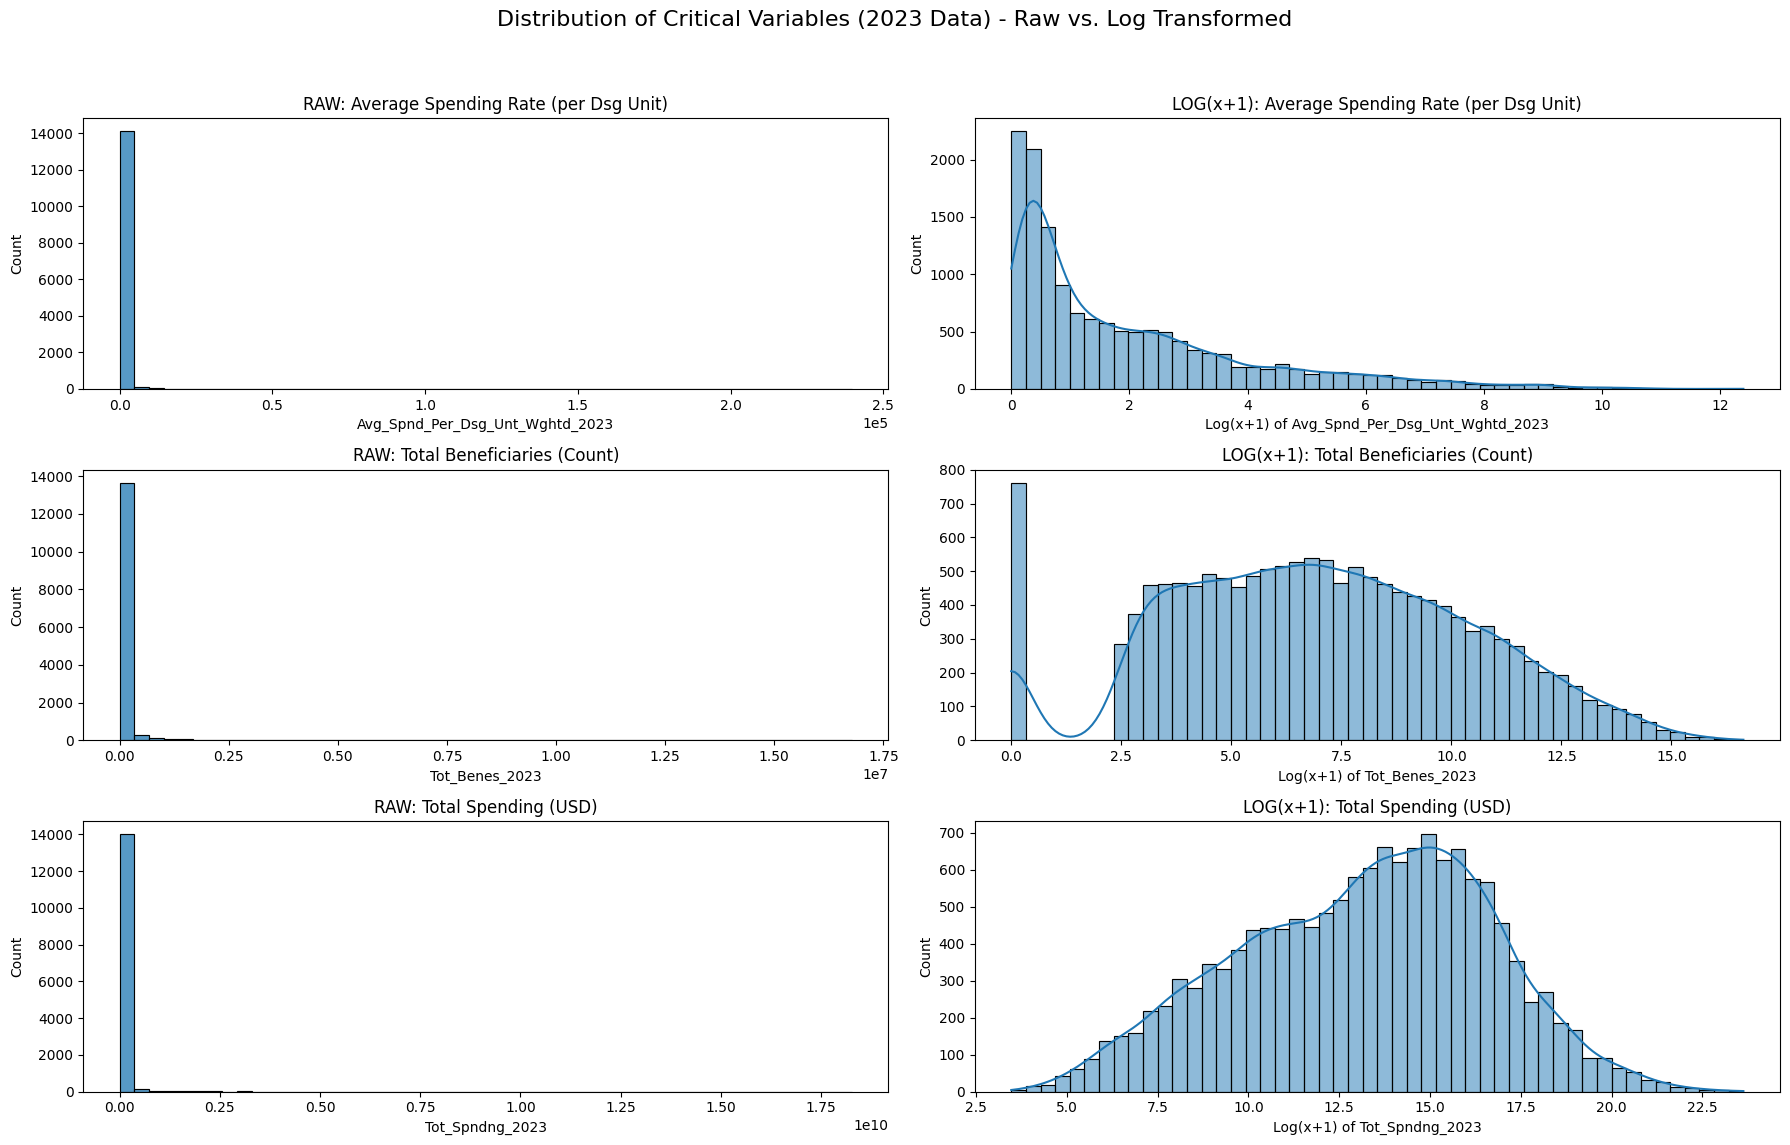

/tmp/ipython-input-607584240.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mftr_spending.index, y=mftr_spending.values, palette="viridis")
/tmp/ipython-input-607584240.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.0f}M'.format(x/1000000) for x in current_values]) # Display in Millions


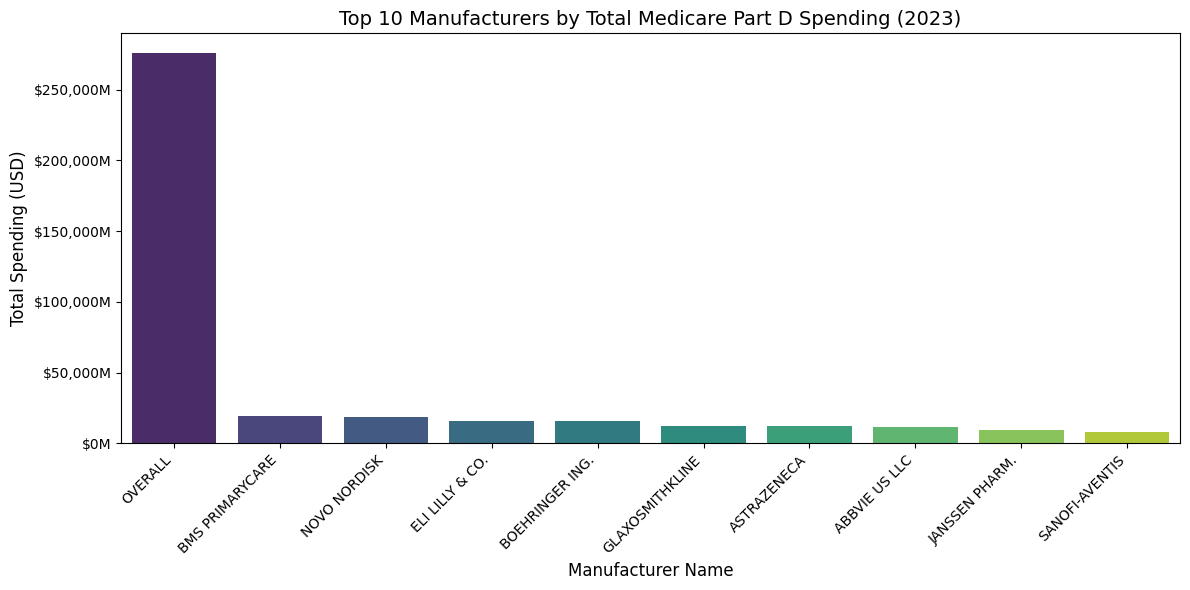

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = df_cleaned # Using 'df' internally

CAT_COLS = ['Brnd_Name', 'Gnrc_Name', 'Mftr_Name']
YEARS = range(2019, 2024)

# Identify all requested continuous columns across 2019-2023
CONT_PREFIXES = ['Tot_Spndng', 'Tot_Benes', 'Avg_Spnd_Per_Dsg_Unt_Wghtd']
CONT_COLS = [f'{prefix}_{year}' for prefix in CONT_PREFIXES for year in YEARS]
PLOT_COLS_2023 = {
    'Avg_Spnd_Per_Dsg_Unt_Wghtd_2023': 'Average Spending Rate (per Dsg Unit)',
    'Tot_Benes_2023': 'Total Beneficiaries (Count)',
    'Tot_Spndng_2023': 'Total Spending (USD)'
}
RATE_COLS_TS = [f'Avg_Spnd_Per_Dsg_Unt_Wghtd_{year}' for year in YEARS]


# 2. DESCRIPTIVE STATISTICS & INSIGHTS

print("A. DESCRIPTIVE STATISTICS FOR CONTINUOUS VARIABLES (2019-2023)")

# Use transposed view and key percentiles (50th, 95th, 99th) to analyze skew and outliers
desc_stats = df[CONT_COLS].describe(percentiles=[.5, .95, .99]).T
print(desc_stats.to_string())

# 3. FREQUENCIES AND TOP 10 ANALYSIS (CATEGORICAL)

print("B. TOP 10 FREQUENCIES (Categorical Variables)")
for col in CAT_COLS:
    print(f"\n--- Top 10 Frequencies for: {col} ---")
    print(df[col].value_counts().head(10).to_string())

# 4. VISUALIZATION: DISTRIBUTION (Raw vs. Log for 2023)

FIG_SIZE = (18, 12)
fig, axes = plt.subplots(3, 2, figsize=FIG_SIZE)
fig.suptitle('Distribution of Critical Variables (2023 Data) - Raw vs. Log Transformed', fontsize=16)

for i, (col, title) in enumerate(PLOT_COLS_2023.items()):
    # Raw Data Plot (Highly Skewed)
    sns.histplot(df[col], kde=False, ax=axes[i, 0], bins=50)
    axes[i, 0].set_title(f'RAW: {title}', fontsize=12)
    axes[i, 0].ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Use scientific notation
    axes[i, 0].set_xlabel(col)

    # Log Transformed Data Plot (Normalized)
    log_data = np.log1p(df[col]) # log(x+1) handles zero values
    sns.histplot(log_data, kde=True, ax=axes[i, 1], bins=50)
    axes[i, 1].set_title(f'LOG(x+1): {title}', fontsize=12)
    axes[i, 1].set_xlabel(f'Log(x+1) of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 5. VISUALIZATION: CATEGORICAL AND TIME SERIES ANALYSIS

# Top 10 Manufacturers by Total Spending (2023)
mftr_spending = df.groupby('Mftr_Name')['Tot_Spndng_2023'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=mftr_spending.index, y=mftr_spending.values, palette="viridis")
plt.title('Top 10 Manufacturers by Total Medicare Part D Spending (2023)', fontsize=14)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xlabel('Manufacturer Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}M'.format(x/1000000) for x in current_values]) # Display in Millions
plt.tight_layout()
plt.show()

Findings from the Descriptive Statistics and Plots:

1. The descriptive statistics reveal right-skewness in all spending and volume metrics (Mean >> Median). This confirms that a small fraction of drugs drives the majority of cost and utilization, and thus, log transformation will be essential for modeling.

2. The frequency counts show market concentration. The top few entries in each category account for a large portion of the dataset's rows, highlighting the most prevalent drugs and manufacturer.

3. Due to the skew, the raw plots are unusable. The Log-transformed histograms show an improved, near-normal distribution for Total Spending and Beneficiaries, but the Average Spending Rate does not, which might be for outlier detection.

4. The top manufacturers absorb a significant portion of the total spending.





Relationship between Variables:

Tot_Benes_YYYY, Tot_Spndng_YYYY, Brnd_Name, Gnrc_Name, Mftr_Name are the variables that appear to be independent and Avg_Spnd_Per_Dsg_Unt_Wghtd seems to be the dependent variable.

A. CORRELATION HEATMAP (Log-Transformed 2023 Data)


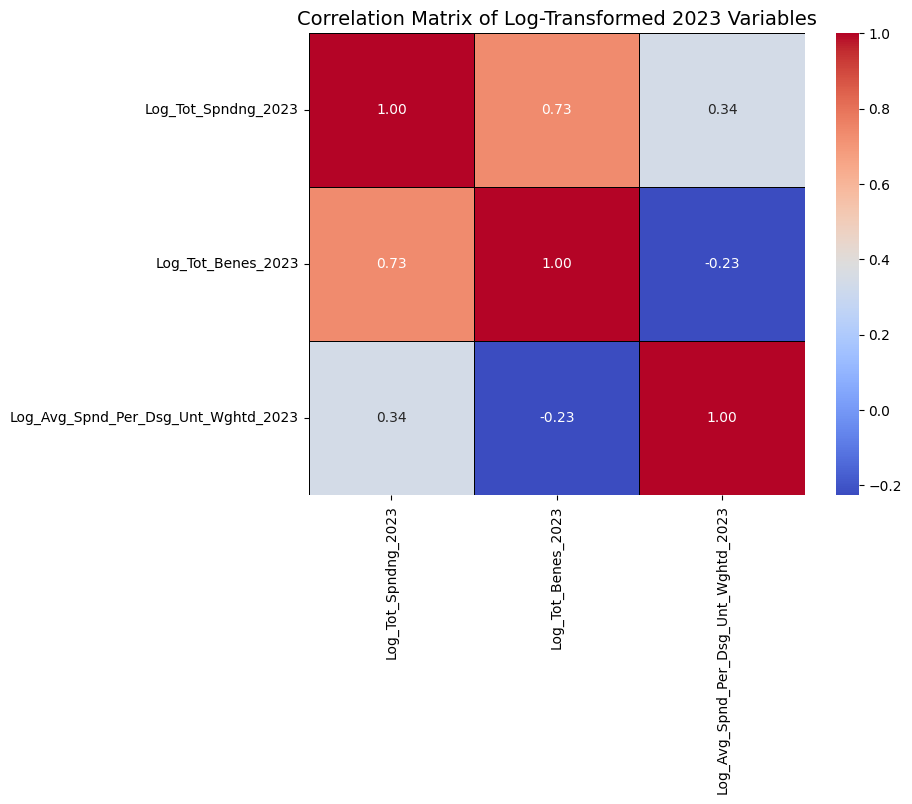

B. PAIRWISE RELATIONSHIP: TESTING THE HYPOTHESIS


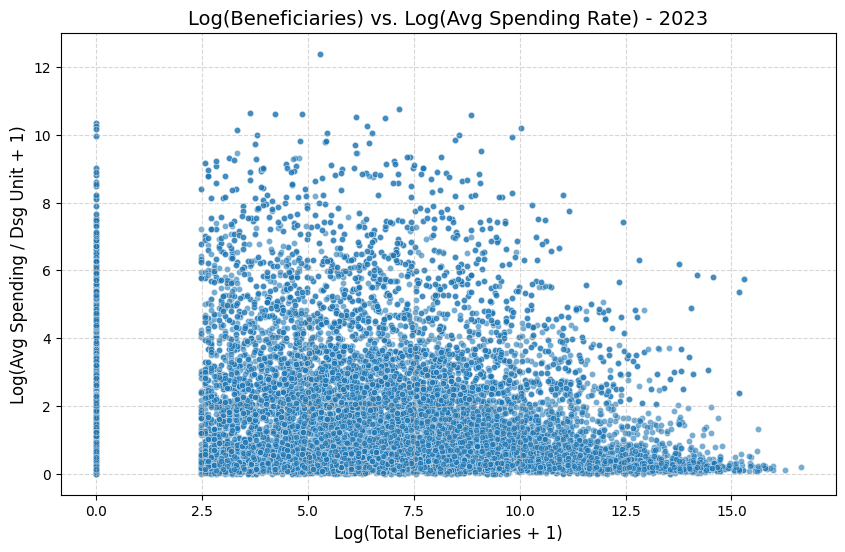

Pearson Correlation (Log-Transformed): -0.226


In [ ]:
#Relationship between Variables


# 1. Defining Variables for Cross-Sectional Analysis (2023)
COLS_2023 = [
    'Tot_Spndng_2023',
    'Tot_Benes_2023',
    'Avg_Spnd_Per_Dsg_Unt_Wghtd_2023'
]

# Creating a log-transformed DataFrame for correlation analysis
# Using np.log1p (log(x+1)) to handle potential zero values
df_log = pd.DataFrame()
for col in COLS_2023:
    df_log[f'Log_{col}'] = np.log1p(df[col])

# 2. Correlation Analysis (Heatmap)
print("A. CORRELATION HEATMAP (Log-Transformed 2023 Data)")

plt.figure(figsize=(8, 6))
correlation_matrix = df_log.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Log-Transformed 2023 Variables', fontsize=14)
plt.show()


# 3. Hypothesis Validation (Pairwise Scatter Plot)
print("B. PAIRWISE RELATIONSHIP: TESTING THE HYPOTHESIS")

# Scatter plot of Utilization (Beneficiaries) vs. Price (Spending Rate)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_log['Log_Tot_Benes_2023'],
    y=df_log['Log_Avg_Spnd_Per_Dsg_Unt_Wghtd_2023'],
    alpha=0.6,
    s=20
)
plt.title('Log(Beneficiaries) vs. Log(Avg Spending Rate) - 2023', fontsize=14)
plt.xlabel('Log(Total Beneficiaries + 1)', fontsize=12)
plt.ylabel('Log(Avg Spending / Dsg Unit + 1)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print the Pearson correlation coefficient
corr_bene_rate = df_log['Log_Tot_Benes_2023'].corr(df_log['Log_Avg_Spnd_Per_Dsg_Unt_Wghtd_2023'])
print(f"Pearson Correlation (Log-Transformed): {corr_bene_rate:.3f}")


Findings from the Relationships plotted:

1. Key finding is that the hypothesis does not hold true. The hypothesis was that higher number of beneficiaries would lead to more average spending per doage unit. Suprisingly the pearson coefficient was negative which means they they are proportional.
- This means that the price plays a stronger part than the volume

2. However, we found that total spending and the total beneficiaries have a high positive correlation.

Thoughts on the Dataset after EDA:

I trust that this is a reasonable dataset to use to predict the avergae spending per dosage unit oer year of the drug and the outliers from it. Here are fews reason why I think so:

1. I am aiming to identify drug cost outliers in the Medicare Part D program. The unit of analysis (Drug-Manufacturer-Year) and the core metrics (Avg_Spnd_Per_Dsg_Unt_Wghtd, Tot_Benes, Tot_Spndng, etc.) are perfectly aligned with the domain and goal

2. The right skewness of the spending signifies that the spending is driven by few drugs which in turn tells that there are outliers and an opportunity to predict them for future spendings

Hence, the data is fit for our purpose.


EDA Overview:

1. The spending metrics were heavily right-skewed which means mean>median and some drugs have higher spending than most of them. Thus we need to use leg transformation for medilling in the feature enginnering step.

2. Through EDA, I found that my hypothesis (higher benefeciaries lead to higher average spending per dosage unit) did not hold true. It was independent of volume.
- However, we discovered that tot_spnding variable and the avaergae spending per dosage unit has a positive pearson coefficient. Hence, we can re-strategize based on this finding.



****

ML Task:

The ML task for my problem statement is Time Series Forecasting. The model is based on supervised learning and it is going to be a linear regression.

From the set of predicted values, we are going to find the outlier drugs through z-score analysis and with that, the outlier prediction would be complete.



Feature Engineering:

For this analysis, the primary goal is time-series forecasting of drug spending and volume, followed by outlier detection on the derived spending rate. The features used fall into two distinct categories:

Grouping/Identifier Features (The Unit of Analysis): These features define the level at which the forecast is performed. The identifier features are at the brand-generic-manufacturer level. So the following are the identifier features:
- Brnd_Name
- Gnrc_Name
- Mftr_Name

Time-Series Features: These are the historical data points used to train the linear model to project the future trend. These features include:
- Tot_Spndng
- Tot_Dsg_Unts
- Year

I created this new feature - "Year" for the regression model. The goal was to convert the wide-format time-series data (where each year is a separate column , ex. Tot_Spndng_2019) into the long format required by a standard time-series model.

The historical years (e.g., 2019, 2020, 2021, etc.) which were column headers, are extracted and collapsed into a single, new discrete feature called Year. This synthetic Year feature then serves as an independent feature in the linear regression model.

I have already imputed and pre-prcessed the data in the previous steps. In feature engineering, I have not removed any features. Although I don't require some columns like claims, beneficiaries, these original columns remain important for any secondary analysis or auditing of the forecast results (e.g., "Was the spending forecast high because the number of beneficiaries was also historically high?").

So by feature engineering, we have created this new feature - year and the features which are important to the model are:
- Brnd_Name
- Gnrc_Name
- Mftr_Name
- Year
- Tot_Spndng
- Tot_Dsg_Unts

With respect to dimensionality reduction, the pivoting has changed the dimensionality from 10 features to 3.

1. Dimensionality Before the Pivot (The "Wide" Format)
- The initial dataset contains the historical data spread across 5 years (2019 to 2023) for two targets: Total Spending and Total Dosage Units.Initial Features: We have 5 features for Spending and 5 features for Dosage Units.Total Number of Features: 5 + 5 = 10 features. In this wide format, each of the 10 columns is technically a separate feature.

2. Dimensionality After the Pivot (The "Long" Format)
- The feature engineering technique of Melting (Pivoting) transforms these 10 features into just 3 features for the model's prediction:
- Year: Independent Variable for the Model
- Tot_Spndng: Dependent Variable for the Model
- Tot_Dsg_Unts: Dependent Variable for the Model

Dimnesionality was not explicilty reduced in this project as the goal is time-series forecasting. This requires:

- Preserving all historical time points: We must keep all five historical years (2019–2023) to capture the trend of a drug.

- Preserving all identifier columns: The Brnd_Name, Gnrc_Name, and Mftr_Name are the keys used to group the data, and cannot be removed or combined without destroying the core unit of analysis.

The following assumptions are inherent in the Simple Linear Regression (SLR) model used for forecasting and the z-score outlier analysis:
- Linearity: We assume the relationship between time (Year) and the target variables Tot_Spndng/ Tot_Dsg_Unts) is linear
- Normality: We assume the distribution of the predicted spending rate (Avg_Spnd_Per_Dsg_Unt_Wghtd_YYYY) is approximately Normal (Gaussian).







Algorithm Selection:

The algorithm used for the Forecasting task is Linear Regression.

This model is applied independently to each unique drug group (identified by Brnd_Name, Gnrc_Name, Mftr_Name) using the historical year (2019-2023) as the single independent feature and the historical spending, dosage units as the dependent target variables.

As I mentioned above, the model I have chosen for the datset assumes the following things:

- Linearity: Assumes the relationship between the independent variable (Year) and the dependent variable (Spending or Dosage) is approximately linear. In our context, this assumes that the drug's spending trend follows a relatively constant rate of growth or decline over the 5-year historical period.
- Normality: We assume the distribution of the predicted spending rate (Avg_Spnd_Per_Dsg_Unt_Wghtd_YYYY) is approximately Normal (Gaussian).
- Independence: Assumes the observations (each year's spending/dosage) are independent of each other.

Liner Regression for my problem statement is prone to few risks:

- Extrapolation Risk: The model is used to forecast 1, 2, and 3 years beyond the training data - which is from 2019-2023. Extrapolating a linear trend far into the future is  risky because external factors (new competitors, patent expiration, regulatory changes) can break the trend.

- Sensitivity to Outliers: Linear Regression is sensitive to outliers (data points far from the line). A single unusually high or low spending year within the 2019-2023 window can skew the calculated trend, leading to a massive error in the 2026 forecast.
  - Mitigation: For production use, a Robust Regression technique can be considered as a direct mitigation, as they down-weight the influence of outliers during the fitting process. We can check the R-squared value after running the model

- Model Simplicity (Underfitting): The model cannot capture non-linear trends. If a drug's growth is exponentially accelerating, SLR will underfit the data.
  -Mitigation: Monitoring the R-squared score is essential. For drugs with a poor R^2, more complex models like Polynomial Regression would be necessary.

  I beleive Linear regression would be a good fit due to the fact that I have only 5 historical data points for a drug group. Fitting a higher model like polynomial regression can lead to overfitting. Linear regression is a good baseline for forecasting and the R^2 score turns out to be low, I will iterate and explore complex regression model. Additionally I have a large volume, I cannot justify fitting complex models (high computation cost) if linear regressions works.

Hyperparameter Tuning:

Linear Regression itself does not have hyperparameters that need tuning (unlike KNN's k or Decision Tree's maximum depth). However, the overall prediction and flagging pipeline relies on three essential tuning constants that govern the final output.

- Z_SCORE_THRESHOLD: For my problem statement of outlier analysis after regression, this value controls the sensitivity of the outlier detection. A higher value (e.g., 4.0) results in fewer flagged outliers (fewer False Positives), while a lower value (e.g., 2.0) flags more drugs (more False Positives, potentially capturing more true outliers). The initial choice of 3.0 follows the statistical "Three-Sigma Rule," indicating an extremely rare event. It should be tuned based on the number of resources available for analysts to investigate flagged drugs.

- FORECAST_YEARS: his is determined entirely by the business need. If the planning horizon extends to 5 years, this list would be extended. Changing this does not affect the model fitting, only the prediction input. Since I have the historical data only till 2023, I am extending to 3 more years till 2026, however, it would have been better if I had the actual data till 2025 (present).

Post-Processing:

A couple of post-processings are applied as it converts the raw regression forecasts into an actionable outlier flag required by the problem statement.
- This process begins with Model Output Corrections, which apply non-negativity constraints to all predicted spending and dosage unit values (since they cannot be negative)
- Also I handle the  division-by-zero errors when calculating the final spending rate.

Apart from the model post-processing, another central post-processing step is the Z-Score Outlier Flagging.

After calculating the predicted spending rate for each drug, the Z-score is computed to measure how many standard deviations the drug's rate is from the average rate. If the Z-score's magnitude exceeds the defined Z_SCORE_THRESHOLD (e.g., 3.0), the drug is marked with an Outlier_Flag of 1, effectively identifying it as a statistically extreme, high-priority item for investigation.

In [ ]:
#ML CODE:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
from typing import List, Union


FILE_NAME = "MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv"
ID_COLS = ['Brnd_Name', 'Gnrc_Name', 'Mftr_Name']
FORECAST_YEARS = [2024, 2025, 2026]
# Historical years to use for validation training and final training
HISTORICAL_YEARS_TRAIN = [2019, 2020, 2021, 2022]
HISTORICAL_YEARS_FULL = HISTORICAL_YEARS_TRAIN + [2023]
TARGET_YEAR_VALIDATION = 2023 # The year to predict for testing/validation
TARGET_PREFIXES = ['Tot_Spndng', 'Tot_Dsg_Unts']
Z_SCORE_THRESHOLD = 3.0 # Standard threshold for detecting outliers (3 standard deviations)
R2_SAMPLE_SIZE = 5000 # Number of drug groups to sample for R-squared calculation

# i was getting user warnings on feature names, have suppressed them using this function below
warnings.filterwarnings(
    'ignore',
    category=UserWarning,
    module='sklearn'
)

# Data Loading and Initial Imputation

def load_and_impute_data(file_path: str) -> pd.DataFrame:
    print(f"Loading data from {file_path}...")
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"ERROR: File not found at {file_path}. Please ensure the file is uploaded.")
        return pd.DataFrame()

    # Identify all historical volume/spending columns
    historical_cols_to_check = [
        f'{prefix}_{year}'
        for prefix in TARGET_PREFIXES
        for year in HISTORICAL_YEARS_FULL
    ]

    # Impute NaNs in volume/spending columns with 0 to ensure model stability
    existing_cols = [c for c in historical_cols_to_check if c in df.columns]
    if existing_cols:
        df[existing_cols] = df[existing_cols].fillna(0)
        print("Volume/Spending NaNs imputed to 0.")

    # For the modeling logic to work, drop rows where all identifier columns are missing
    df.dropna(subset=ID_COLS, how='all', inplace=True)
    print(f"Initial data shape: {df.shape}")

    return df

# Linear Regression Forecasting Function

def simple_linear_forecast_by_group(
    group_data: pd.DataFrame,
    forecast_year: int,
    prefix: str,
    train_years: List[int]
) -> Union[float, type(np.nan)]:

    # Filter data to only include the specified training years
    group_data_train = group_data[group_data['Year'].isin(train_years)].copy()

    # Prepare X (Year) and Y (Target)
    X_train = group_data_train[['Year']]
    Y_train = group_data_train[prefix]

    # Must have at least two points to fit a line, and the target must vary
    if len(group_data_train) < 2 or len(Y_train.unique()) == 1:
        return np.nan

    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Create the prediction input
    X_forecast = pd.DataFrame({'Year': [forecast_year]})

    Y_forecast = model.predict(X_forecast)[0]

    # Post-processing: Spending and Dosage units cannot be negative
    return max(0, Y_forecast)

# Model Validation (testing on 2023 data)

def validate_model_on_2023(df: pd.DataFrame, sample_size: int = R2_SAMPLE_SIZE) -> None:
    print(f" MODEL VALIDATION (testing on {TARGET_YEAR_VALIDATION})")

    # Prepare Long Format Data for Validation Training (2019-2022)
    hist_cols = [f'Tot_Spndng_{year}' for year in HISTORICAL_YEARS_FULL]

    df_long = pd.melt(
        df[ID_COLS + hist_cols],
        id_vars=ID_COLS,
        value_vars=hist_cols,
        var_name='Year_Raw',
        value_name='Tot_Spndng_Target'
    )
    df_long['Year'] = df_long['Year_Raw'].str.split('_').str[-1].astype(int)

    # Sample Groups for Efficiency
    unique_groups = df_long.groupby(ID_COLS).size().index
    if len(unique_groups) < sample_size:
        sample_size = len(unique_groups)

    np.random.seed(42)
    random_indices = np.random.choice(len(unique_groups), size=sample_size, replace=False)
    sample_groups = unique_groups[random_indices]

    mae_scores = []

    for group_ids in sample_groups:
        # Filter data for current group
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        # Predict 2023 using 2019-2022 data
        predicted_2023 = simple_linear_forecast_by_group(
            group_data=group_data,
            forecast_year=TARGET_YEAR_VALIDATION,
            prefix='Tot_Spndng_Target',
            train_years=HISTORICAL_YEARS_TRAIN # Train only on 2019-2022
        )

        # Get actual 2023 value
        actual_2023_row = group_data[group_data['Year'] == TARGET_YEAR_VALIDATION]
        if actual_2023_row.empty or pd.isna(predicted_2023):
            continue

        actual_2023 = actual_2023_row['Tot_Spndng_Target'].iloc[0]

        # Calculate MAE for this group
        mae = abs(actual_2023 - predicted_2023)
        mae_scores.append(mae)

    mae_series = pd.Series(mae_scores).dropna()

    if mae_series.empty:
        print("Could not calculate MAE for the sample due to insufficient data.")
        return

    print(f"Model Performance (Backtested on {TARGET_YEAR_VALIDATION}):")
    print("-" * 55)
    print(f"Mean Absolute Error (MAE): {mae_series.mean():,.2f}")
    print(f"Median Absolute Error (MAE):{mae_series.median():,.2f}")
    print(f"Max Absolute Error (MAE):  {mae_series.max():,.2f}")


    # Calculate R-squared for the sample of predictions vs actuals
    # We need to collect all actuals and predictions for the sample
    actuals = []
    predictions = []

    for group_ids in sample_groups:
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        predicted_2023 = simple_linear_forecast_by_group(
            group_data=group_data,
            forecast_year=TARGET_YEAR_VALIDATION,
            prefix='Tot_Spndng_Target',
            train_years=HISTORICAL_YEARS_TRAIN
        )

        actual_2023_row = group_data[group_data['Year'] == TARGET_YEAR_VALIDATION]
        if not actual_2023_row.empty and not pd.isna(predicted_2023):
            actuals.append(actual_2023_row['Tot_Spndng_Target'].iloc[0])
            predictions.append(predicted_2023)

    if len(actuals) > 1:
        # Calculate R-squared for the validation set (2023)
        r2_validation = r2_score(actuals, predictions)
        print(f"R-squared (R²) on {TARGET_YEAR_VALIDATION} Predictions: {r2_validation:.4f}")



# Main Forecasting and Outlier Detection Loop (Using Full Data)

def run_forecast_and_outlier_detection(df: pd.DataFrame) -> pd.DataFrame:

    historical_data = df.copy()

    for year in FORECAST_YEARS:
        print(f"\n--- Running Final Forecast and Detection for Year: {year} ---")

        # Forecast Tot_Spndng and Tot_Dsg_Unts
        for prefix in TARGET_PREFIXES:

            # Identify historical columns for the current prefix (2019-2023)
            hist_cols = [f'{prefix}_{y}' for y in HISTORICAL_YEARS_FULL]

            # Melt the data for this prefix (creating the "long" training set)
            df_long_prefix = pd.melt(
                historical_data[ID_COLS + hist_cols],
                id_vars=ID_COLS,
                value_vars=hist_cols,
                var_name='Year_Raw',
                value_name=prefix
            )
            df_long_prefix['Year'] = df_long_prefix['Year_Raw'].str.split('_').str[-1].astype(int)

            # Apply the forecast model by grouping
            forecast_col_name = f'{prefix}_{year}'

            forecast_series = df_long_prefix.groupby(ID_COLS).apply(
                simple_linear_forecast_by_group,
                forecast_year=year,
                prefix=prefix,
                train_years=HISTORICAL_YEARS_FULL # Train using 2019-2023
            ).rename(forecast_col_name)

            #Merge the forecasted column back to the main DataFrame
            df = df.merge(
                forecast_series.reset_index(),
                on=ID_COLS,
                how='left'
            )
            print(f"Forecasted column: {forecast_col_name}")


        # Calculate Avg_Spnd_Per_Dsg_Unt_Wghtd_YYYY ---
        spend_col = f'Tot_Spndng_{year}'
        dosage_col = f'Tot_Dsg_Unts_{year}'
        rate_col = f'Avg_Spnd_Per_Dsg_Unt_Wghtd_{year}'

        # Calculate rate, handling division by zero (set to 0 if dosage units are 0)
        df[rate_col] = np.where(
            (df[dosage_col].isna()) | (df[dosage_col] == 0),
            0,
            df[spend_col] / df[dosage_col]
        )
        df[rate_col].fillna(0, inplace=True)
        print(f"Calculated rate column: {rate_col}")


        #Z-Score Outlier Detection
        outlier_col = f'Outlier_Flag_{year}'

        #Use only non-zero rates for Z-score calculation
        valid_rates = df[df[rate_col] > 0][rate_col]

        if len(valid_rates) > 1:
            mu = valid_rates.mean()
            sigma = valid_rates.std()

            z_score_col = f'Z_Score_{year}'
            df[z_score_col] = np.where(
                df[rate_col] > 0,
                (df[rate_col] - mu) / sigma,
                0
            )

            df[outlier_col] = np.where(
                df[z_score_col].abs() > Z_SCORE_THRESHOLD,
                1,
                0
            )

            outlier_count = df[df[outlier_col] == 1].shape[0]
            print(f" Created outlier flag: {outlier_col} ({outlier_count} outliers found)")

        else:
            df[outlier_col] = 0
            print(f"  Not enough valid data points to calculate Z-score. {outlier_col} set to 0.")

    return df

# Historical R-squared (R2) Evaluation on Full Training Set

def calculate_r2_sample(df: pd.DataFrame, sample_size: int = R2_SAMPLE_SIZE) -> None:

    print("\n" + "=" * 50)
    print(f"R-SQUARED (R2) MODEL FIT EVALUATION (Sample Size: {sample_size})")
    print("=" * 50)

    # Use the full historical set for R2 calculation
    hist_cols = [f'Tot_Spndng_{year}' for year in HISTORICAL_YEARS_FULL]

    existing_hist_cols = [c for c in hist_cols if c in df.columns]
    if not existing_hist_cols:
         print("Error: Historical spending columns not found in DataFrame.")
         return

    df_long = pd.melt(
        df[ID_COLS + existing_hist_cols],
        id_vars=ID_COLS,
        value_vars=existing_hist_cols,
        var_name='Year_Raw',
        value_name='Tot_Spndng'
    )
    df_long['Year'] = df_long['Year_Raw'].str.split('_').str[-1].astype(int)

    unique_groups = df_long.groupby(ID_COLS).size().index

    if len(unique_groups) == 0:
         print("Error: No unique groups found.")
         return

    if len(unique_groups) < sample_size:
        sample_size = len(unique_groups)
        print(f"Warning: Dataset size is smaller than requested sample. Using N={sample_size}.")

    # Random sample
    np.random.seed(42)
    random_indices = np.random.choice(len(unique_groups), size=sample_size, replace=False)
    sample_groups = unique_groups[random_indices]

    r2_scores = []

    for group_ids in sample_groups:
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        # Only include years used for the final training (2019-2023)
        group_data = group_data[group_data['Year'].isin(HISTORICAL_YEARS_FULL)]

        X_train = group_data[['Year']]
        Y_train = group_data['Tot_Spndng']

        if len(group_data) < 2 or len(Y_train.unique()) == 1:
            r2_scores.append(np.nan)
            continue

        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_train)

        r2 = r2_score(Y_train, Y_pred)
        r2_scores.append(r2)

    r2_series = pd.Series(r2_scores).dropna()

    if r2_series.empty:
        print("Could not calculate R-squared for the sample due to insufficient data.")
        return

    print("R-squared (R²) Score Distribution for Total Spending Forecast (2019-2023 Fit):")
    print("-" * 55)
    print(f"Average R² (Mean):    {r2_series.mean():.4f}")
    print(f"Median R² (50th %ile):{r2_series.median():.4f}")
    print(f"Minimum R² (Min):     {r2_series.min():.4f}")
    print(f"Maximum R² (Max):     {r2_series.max():.4f}")
    print("\nPercentiles:")
    print(r2_series.quantile([0.25, 0.75]).apply(lambda x: f'{x:.4f}').to_string())

# Execution

if __name__ == "__main__":

    # Load
    df = load_and_impute_data(FILE_NAME)

    if not df.empty:
        # Validation (Train on 2019-2022, Predict 2023)
        validate_model_on_2023(df)

        # Final Forecast (Train on 2019-2023, Predict 2024-2026)
        df_forecasted = run_forecast_and_outlier_detection(df)

        # R-squared Check on Full Training Data
        calculate_r2_sample(df_forecasted)

        # Save
        output_file = "MedicarePartD_Forecasted_Outliers.csv"
        df_forecasted.to_csv(output_file, index=False)

        print("\n" + "=" * 50)
        print(f"FINAL RESULT: Forecasted Data Saved to {output_file}")
        print("=" * 50)

        # 5. Top Outliers
        PREDICTED_RATE_COL = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2026'
        OUTLIER_FLAG_COL = 'Outlier_Flag_2026'
        Z_SCORE_COL = 'Z_Score_2026'

        if OUTLIER_FLAG_COL in df_forecasted.columns:
            top_outliers = df_forecasted[df_forecasted[OUTLIER_FLAG_COL] == 1].sort_values(
                by=PREDICTED_RATE_COL, ascending=False
            ).head(5)

            print("\nTop 5 Predicted Outliers (Highest Spending Rate) for 2026:")

            cols_to_print = ID_COLS + [PREDICTED_RATE_COL]
            if Z_SCORE_COL in df_forecasted.columns:
                cols_to_print.append(Z_SCORE_COL)

            print(top_outliers[cols_to_print].to_string(index=False))

Loading data from MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv...
Volume/Spending NaNs imputed to 0.
Initial data shape: (14309, 46)
 MODEL VALIDATION (testing on 2023)


KeyboardInterrupt: 

In [ ]:
from google.colab import files
files.download('MedicarePartD_Forecasted_Outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



Evaluating my model:

My model has two components to it:
- Forecasting of total spending and total dosage units
- Outlier Detection (for the drugs based on the average spending per dosage)

I am first running a regression model and then running a binary classification on top of the forecasted values to check if it is an outlier or not.

So, for the regression, I believe using the R^2 score, the Mean and Median Absolute Errors would be a good evealuation method for my linear regression model.

A high R^2 score will tell us that the model fit well to the data and that the historical trend has been linear. The median absolute error will give the median of the magnitude of the errors (the difference between the actual value and the predicted value) across the dataset which can give a sense of how far the forecast was off by.





In [ ]:
#Metrics:

validate_model_on_2023(df)

 MODEL VALIDATION (testing on 2023)
Model Performance (Backtested on 2023):
-------------------------------------------------------
Mean Absolute Error (MAE): 8,904,147.07
Median Absolute Error (MAE):283,314.51
Max Absolute Error (MAE):  3,531,241,508.70
R-squared (R²) on 2023 Predictions: 0.9551


In [ ]:
#Printing the Metrics to derive insights

R2_SAMPLE_SIZE = 10000

def validate_model_on_2023(df: pd.DataFrame, sample_size: int = R2_SAMPLE_SIZE) -> None:
    print(f" MODEL VALIDATION (testing on {TARGET_YEAR_VALIDATION})")

    # Prepare Long Format Data for Validation Training (2019-2022)
    hist_cols = [f'Tot_Spndng_{year}' for year in HISTORICAL_YEARS_FULL]

    df_long = pd.melt(
        df[ID_COLS + hist_cols],
        id_vars=ID_COLS,
        value_vars=hist_cols,
        var_name='Year_Raw',
        value_name='Tot_Spndng_Target'
    )
    df_long['Year'] = df_long['Year_Raw'].str.split('_').str[-1].astype(int)

    # Sample Groups for Efficiency
    unique_groups = df_long.groupby(ID_COLS).size().index
    if len(unique_groups) < sample_size:
        sample_size = len(unique_groups)

    np.random.seed(42)
    random_indices = np.random.choice(len(unique_groups), size=sample_size, replace=False)
    sample_groups = unique_groups[random_indices]

    mae_scores = []

    for group_ids in sample_groups:
        # Filter data for current group
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        # Predict 2023 using 2019-2022 data
        predicted_2023 = simple_linear_forecast_by_group(
            group_data=group_data,
            forecast_year=TARGET_YEAR_VALIDATION,
            prefix='Tot_Spndng_Target',
            train_years=HISTORICAL_YEARS_TRAIN # Train only on 2019-2022
        )

        # Get actual 2023 value
        actual_2023_row = group_data[group_data['Year'] == TARGET_YEAR_VALIDATION]
        if actual_2023_row.empty or pd.isna(predicted_2023):
            continue

        actual_2023 = actual_2023_row['Tot_Spndng_Target'].iloc[0]

        # Calculate MAE for this group
        mae = abs(actual_2023 - predicted_2023)
        mae_scores.append(mae)

    mae_series = pd.Series(mae_scores).dropna()

    if mae_series.empty:
        print("Could not calculate MAE for the sample due to insufficient data.")
        return

    print(f"Model Performance (Backtested on {TARGET_YEAR_VALIDATION}):")
    print("-" * 55)
    print(f"Mean Absolute Error (MAE): {mae_series.mean():,.2f}")
    print(f"Median Absolute Error (MAE):{mae_series.median():,.2f}")
    print(f"Max Absolute Error (MAE):  {mae_series.max():,.2f}")


    # Calculate R-squared for the sample of predictions vs actuals
    # We need to collect all actuals and predictions for the sample
    actuals = []
    predictions = []

    for group_ids in sample_groups:
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        predicted_2023 = simple_linear_forecast_by_group(
            group_data=group_data,
            forecast_year=TARGET_YEAR_VALIDATION,
            prefix='Tot_Spndng_Target',
            train_years=HISTORICAL_YEARS_TRAIN
        )

        actual_2023_row = group_data[group_data['Year'] == TARGET_YEAR_VALIDATION]
        if not actual_2023_row.empty and not pd.isna(predicted_2023):
            actuals.append(actual_2023_row['Tot_Spndng_Target'].iloc[0])
            predictions.append(predicted_2023)

    if len(actuals) > 1:
        # Calculate R-squared for the validation set (2023)
        r2_validation = r2_score(actuals, predictions)
        print(f"R-squared (R²) on {TARGET_YEAR_VALIDATION} Predictions: {r2_validation:.4f}")

def calculate_r2_sample(df: pd.DataFrame, sample_size: int = R2_SAMPLE_SIZE) -> None:

    print("\n" + "=" * 50)
    print(f"R-SQUARED (R2) MODEL FIT EVALUATION (Sample Size: {sample_size})")
    print("=" * 50)

    # Use the full historical set for R2 calculation
    hist_cols = [f'Tot_Spndng_{year}' for year in HISTORICAL_YEARS_FULL]

    existing_hist_cols = [c for c in hist_cols if c in df.columns]
    if not existing_hist_cols:
         print("Error: Historical spending columns not found in DataFrame.")
         return

    df_long = pd.melt(
        df[ID_COLS + existing_hist_cols],
        id_vars=ID_COLS,
        value_vars=existing_hist_cols,
        var_name='Year_Raw',
        value_name='Tot_Spndng'
    )
    df_long['Year'] = df_long['Year_Raw'].str.split('_').str[-1].astype(int)

    unique_groups = df_long.groupby(ID_COLS).size().index

    if len(unique_groups) == 0:
         print("Error: No unique groups found.")
         return

    if len(unique_groups) < sample_size:
        sample_size = len(unique_groups)
        print(f"Warning: Dataset size is smaller than requested sample. Using N={sample_size}.")

    # Random sample
    np.random.seed(42)
    random_indices = np.random.choice(len(unique_groups), size=sample_size, replace=False)
    sample_groups = unique_groups[random_indices]

    r2_scores = []

    for group_ids in sample_groups:
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        # Only include years used for the final training (2019-2023)
        group_data = group_data[group_data['Year'].isin(HISTORICAL_YEARS_FULL)]

        X_train = group_data[['Year']]
        Y_train = group_data['Tot_Spndng']

        if len(group_data) < 2 or len(Y_train.unique()) == 1:
            r2_scores.append(np.nan)
            continue

        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_train)

        r2 = r2_score(Y_train, Y_pred)
        r2_scores.append(r2)

    r2_series = pd.Series(r2_scores).dropna()

    if r2_series.empty:
        print("Could not calculate R-squared for the sample due to insufficient data.")
        return

    print("R-squared (R²) Score Distribution for Total Spending Forecast (2019-2023 Fit):")
    print("-" * 55)
    print(f"Average R² (Mean):    {r2_series.mean():.4f}")
    print(f"Median R² (50th %ile):{r2_series.median():.4f}")
    print(f"Minimum R² (Min):     {r2_series.min():.4f}")
    print(f"Maximum R² (Max):     {r2_series.max():.4f}")
    print("\nPercentiles:")
    print(r2_series.quantile([0.25, 0.75]).apply(lambda x: f'{x:.4f}').to_string())

validate_model_on_2023(df)
calculate_r2_sample(df)


 MODEL VALIDATION (testing on 2023)
Model Performance (Backtested on 2023):
-------------------------------------------------------
Mean Absolute Error (MAE): 8,812,656.28
Median Absolute Error (MAE):302,906.97
Max Absolute Error (MAE):  3,531,241,508.70
R-squared (R²) on 2023 Predictions: 0.9570

R-SQUARED (R2) MODEL FIT EVALUATION (Sample Size: 10000)
R-squared (R²) Score Distribution for Total Spending Forecast (2019-2023 Fit):
-------------------------------------------------------
Average R² (Mean):    0.6103
Median R² (50th %ile):0.6700
Minimum R² (Min):     0.0000
Maximum R² (Max):     0.9998

Percentiles:
0.25    0.4559
0.75    0.8680


Evaluation of the Fit:

The model got an R^2 score of 0.9551 on the validation set (the unseen 2023 data), which is high and great. This means that 95.51% of the variance in the 2023 spending was correctly predicted by the straight-line trends established in the 2019-2022 period.

Looking at the R^2 scores from the training set (2019 - 22):
- While the average R^2 (0.6147) and median R^2 (0.6710) are decent, the median suggests that half of the drug groups have an R^2 of 0.6710 or less. This tells that the model is underfit.

Potential to explore other models:

Since we know that the model underfits a little, I want to try using polynomial regression for my model.The higher order trend line, with the curvature could better fit the drug groups which are accelerating exponentially or decelerating. I beleive this would improve the underfitting problem.

Additionally, I can also tweak the model by regularizing it with ridge regression (L2). The penalization would prevent from volatile data points in the historical trend to skew the trend line. This could also help improve the underfitting.






In [ ]:
#Trying out polynomial regression with Ridge reqularization (trying out both the additional algorithms)

# UPDATED ML CODE WITH POLYNOMIAL RIDGE REGRESSION

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
from typing import List, Union


FILE_NAME = "MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv"
ID_COLS = ['Brnd_Name', 'Gnrc_Name', 'Mftr_Name']
FORECAST_YEARS = [2024, 2025, 2026]
# Historical years to use for validation training and final training
HISTORICAL_YEARS_TRAIN = [2019, 2020, 2021, 2022]
HISTORICAL_YEARS_FULL = HISTORICAL_YEARS_TRAIN + [2023]
TARGET_YEAR_VALIDATION = 2023 # The year to predict for testing/validation
TARGET_PREFIXES = ['Tot_Spndng', 'Tot_Dsg_Unts']
Z_SCORE_THRESHOLD = 3.0 # Standard threshold for detecting outliers (3 standard deviations)
R2_SAMPLE_SIZE = 5000 # Number of drug groups to sample for R-squared calculation
POLYNOMIAL_DEGREE = 2
RIDGE_ALPHA = 0.1 # Regularization strength

# i was getting user warnings on feature names, have suppressed them using this function below
warnings.filterwarnings(
    'ignore',
    category=UserWarning,
    module='sklearn'
)

# Data Loading and Initial Imputation

def load_and_impute_data(file_path: str) -> pd.DataFrame:
    print(f"Loading data from {file_path}...")
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"ERROR: File not found at {file_path}. Please ensure the file is uploaded.")
        return pd.DataFrame()

    # Identify all historical volume/spending columns
    historical_cols_to_check = [
        f'{prefix}_{year}'
        for prefix in TARGET_PREFIXES
        for year in HISTORICAL_YEARS_FULL
    ]

    # Impute NaNs in volume/spending columns with 0 to ensure model stability
    existing_cols = [c for c in historical_cols_to_check if c in df.columns]
    if existing_cols:
        df[existing_cols] = df[existing_cols].fillna(0)
        print("Volume/Spending NaNs imputed to 0.")

    # For the modeling logic to work, drop rows where all identifier columns are missing
    df.dropna(subset=ID_COLS, how='all', inplace=True)
    print(f"Initial data shape: {df.shape}")

    return df


# UPDATED Forecasting Function:
def polynomial_ridge_forecast_by_group(
    group_data: pd.DataFrame,
    forecast_year: int,
    prefix: str,
    train_years: List[int]
) -> Union[float, type(np.nan)]:

    # Filter data to only include the specified training years
    group_data_train = group_data[group_data['Year'].isin(train_years)].copy()

    # Prepare X (Year) and Y (Target)
    X_train = group_data_train[['Year']]
    Y_train = group_data_train[prefix]

    # Must have at least two points to fit a line, and the target must vary
    if len(group_data_train) < 2 or len(Y_train.unique()) == 1:
        return np.nan

    # Create the Polynomial Ridge Pipeline
    model = make_pipeline(
        PolynomialFeatures(POLYNOMIAL_DEGREE),
        Ridge(alpha=RIDGE_ALPHA)
    )

    # Fit the model
    try:
        model.fit(X_train, Y_train)
    except ValueError:
        # Handle cases where Ridge fails to fit due to perfect multicollinearity (rare with only 'Year')
        return np.nan

    # Create the prediction input
    X_forecast = pd.DataFrame({'Year': [forecast_year]})

    Y_forecast = model.predict(X_forecast)[0]

    # Post-processing: Spending and Dosage units cannot be negative
    return max(0, Y_forecast)


# Model Validation (testing on 2023 data)
def validate_model_on_2023(df: pd.DataFrame, sample_size: int = R2_SAMPLE_SIZE) -> None:
    print(f" MODEL VALIDATION (testing on {TARGET_YEAR_VALIDATION})")

    # Prepare Long Format Data for Validation Training (2019-2022)
    hist_cols = [f'Tot_Spndng_{year}' for year in HISTORICAL_YEARS_FULL]

    df_long = pd.melt(
        df[ID_COLS + hist_cols],
        id_vars=ID_COLS,
        value_vars=hist_cols,
        var_name='Year_Raw',
        value_name='Tot_Spndng_Target'
    )
    df_long['Year'] = df_long['Year_Raw'].str.split('_').str[-1].astype(int)

    # Sample Groups for Efficiency
    unique_groups = df_long.groupby(ID_COLS).size().index
    if len(unique_groups) < sample_size:
        sample_size = len(unique_groups)

    np.random.seed(42)
    random_indices = np.random.choice(len(unique_groups), size=sample_size, replace=False)
    sample_groups = unique_groups[random_indices]

    mae_scores = []

    for group_ids in sample_groups:
        # Filter data for current group
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        # Predict 2023 using 2019-2022 data
        predicted_2023 = polynomial_ridge_forecast_by_group( # --- Function name change ---
            group_data=group_data,
            forecast_year=TARGET_YEAR_VALIDATION,
            prefix='Tot_Spndng_Target',
            train_years=HISTORICAL_YEARS_TRAIN # Train only on 2019-2022
        )

        # Get actual 2023 value
        actual_2023_row = group_data[group_data['Year'] == TARGET_YEAR_VALIDATION]
        if actual_2023_row.empty or pd.isna(predicted_2023):
            continue

        actual_2023 = actual_2023_row['Tot_Spndng_Target'].iloc[0]

        # Calculate MAE for this group
        mae = abs(actual_2023 - predicted_2023)
        mae_scores.append(mae)

    mae_series = pd.Series(mae_scores).dropna()

    if mae_series.empty:
        print("Could not calculate MAE for the sample due to insufficient data.")
        return

    print(f"Model Performance (Backtested on {TARGET_YEAR_VALIDATION}):")
    print("-" * 55)
    print(f"Mean Absolute Error (MAE): {mae_series.mean():,.2f}")
    print(f"Median Absolute Error (MAE):{mae_series.median():,.2f}")
    print(f"Max Absolute Error (MAE):  {mae_series.max():,.2f}")


    # Calculate R-squared for the sample of predictions vs actuals
    actuals = []
    predictions = []

    for group_ids in sample_groups:
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        predicted_2023 = polynomial_ridge_forecast_by_group( # --- Function name change ---
            group_data=group_data,
            forecast_year=TARGET_YEAR_VALIDATION,
            prefix='Tot_Spndng_Target',
            train_years=HISTORICAL_YEARS_TRAIN
        )

        actual_2023_row = group_data[group_data['Year'] == TARGET_YEAR_VALIDATION]
        if not actual_2023_row.empty and not pd.isna(predicted_2023):
            actuals.append(actual_2023_row['Tot_Spndng_Target'].iloc[0])
            predictions.append(predicted_2023)

    if len(actuals) > 1:
        # Calculate R-squared for the validation set (2023)
        r2_validation = r2_score(actuals, predictions)
        print(f"R-squared (R²) on {TARGET_YEAR_VALIDATION} Predictions: {r2_validation:.4f}")


# Main Forecasting and Outlier Detection Loop (Using Full Data)
def run_forecast_and_outlier_detection(df: pd.DataFrame) -> pd.DataFrame:

    historical_data = df.copy()

    for year in FORECAST_YEARS:
        print(f"\n--- Running Final Forecast and Detection for Year: {year} ---")

        # Forecast Tot_Spndng and Tot_Dsg_Unts
        for prefix in TARGET_PREFIXES:

            # Identify historical columns for the current prefix (2019-2023)
            hist_cols = [f'{prefix}_{y}' for y in HISTORICAL_YEARS_FULL]

            # Melt the data for this prefix (creating the "long" training set)
            df_long_prefix = pd.melt(
                historical_data[ID_COLS + hist_cols],
                id_vars=ID_COLS,
                value_vars=hist_cols,
                var_name='Year_Raw',
                value_name=prefix
            )
            df_long_prefix['Year'] = df_long_prefix['Year_Raw'].str.split('_').str[-1].astype(int)

            # Apply the forecast model by grouping
            forecast_col_name = f'{prefix}_{year}'

            forecast_series = df_long_prefix.groupby(ID_COLS).apply(
                polynomial_ridge_forecast_by_group, # --- Function name change ---
                forecast_year=year,
                prefix=prefix,
                train_years=HISTORICAL_YEARS_FULL # Train using 2019-2023
            ).rename(forecast_col_name)

            #Merge the forecasted column back to the main DataFrame
            df = df.merge(
                forecast_series.reset_index(),
                on=ID_COLS,
                how='left'
            )
            print(f"Forecasted column: {forecast_col_name}")


        # Calculate Avg_Spnd_Per_Dsg_Unt_Wghtd_YYYY
        spend_col = f'Tot_Spndng_{year}'
        dosage_col = f'Tot_Dsg_Unts_{year}'
        rate_col = f'Avg_Spnd_Per_Dsg_Unt_Wghtd_{year}'

        # Calculate rate, handling division by zero (set to 0 if dosage units are 0)
        df[rate_col] = np.where(
            (df[dosage_col].isna()) | (df[dosage_col] == 0),
            0,
            df[spend_col] / df[dosage_col]
        )
        df[rate_col].fillna(0, inplace=True)
        print(f"Calculated rate column: {rate_col}")


        #Z-Score Outlier Detection
        outlier_col = f'Outlier_Flag_{year}'

        valid_rates = df[df[rate_col] > 0][rate_col]

        if len(valid_rates) > 1:
            mu = valid_rates.mean()
            sigma = valid_rates.std()

            z_score_col = f'Z_Score_{year}'
            df[z_score_col] = np.where(
                df[rate_col] > 0,
                (df[rate_col] - mu) / sigma,
                0
            )

            df[outlier_col] = np.where(
                df[z_score_col].abs() > Z_SCORE_THRESHOLD,
                1,
                0
            )

            outlier_count = df[df[outlier_col] == 1].shape[0]
            print(f" Created outlier flag: {outlier_col} ({outlier_count} outliers found)")

        else:
            df[outlier_col] = 0
            print(f"  Not enough valid data points to calculate Z-score. {outlier_col} set to 0.")

    return df

# Historical R-squared (R2) Evaluation on Full Training Set
def calculate_r2_sample(df: pd.DataFrame, sample_size: int = R2_SAMPLE_SIZE) -> None:

    print("\n" + "=" * 50)
    print(f"R-SQUARED (R2) MODEL FIT EVALUATION (Sample Size: {sample_size})")
    print("=" * 50)

    #full historical set for R2 calculation
    hist_cols = [f'Tot_Spndng_{year}' for year in HISTORICAL_YEARS_FULL]

    existing_hist_cols = [c for c in hist_cols if c in df.columns]
    if not existing_hist_cols:
         print("Error: Historical spending columns not found in DataFrame.")
         return

    df_long = pd.melt(
        df[ID_COLS + existing_hist_cols],
        id_vars=ID_COLS,
        value_vars=existing_hist_cols,
        var_name='Year_Raw',
        value_name='Tot_Spndng'
    )
    df_long['Year'] = df_long['Year_Raw'].str.split('_').str[-1].astype(int)

    unique_groups = df_long.groupby(ID_COLS).size().index

    if len(unique_groups) == 0:
         print("Error: No unique groups found.")
         return

    if len(unique_groups) < sample_size:
        sample_size = len(unique_groups)
        print(f"Warning: Dataset size is smaller than requested sample. Using N={sample_size}.")

    # Random sample
    np.random.seed(42)
    random_indices = np.random.choice(len(unique_groups), size=sample_size, replace=False)
    sample_groups = unique_groups[random_indices]

    r2_scores = []

    for group_ids in sample_groups:
        group_data = df_long[
            (df_long['Brnd_Name'] == group_ids[0]) &
            (df_long['Gnrc_Name'] == group_ids[1]) &
            (df_long['Mftr_Name'] == group_ids[2])
        ].copy()

        # Only include years used for the final training (2019-2023)
        group_data = group_data[group_data['Year'].isin(HISTORICAL_YEARS_FULL)]

        X_train = group_data[['Year']]
        Y_train = group_data['Tot_Spndng']

        if len(group_data) < 2 or len(Y_train.unique()) == 1:
            r2_scores.append(np.nan)
            continue

        # UPDATED FIT FOR R2 CALCULATION
        model = make_pipeline(
            PolynomialFeatures(POLYNOMIAL_DEGREE),
            Ridge(alpha=RIDGE_ALPHA)
        )

        try:
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_train)
            r2 = r2_score(Y_train, Y_pred)
            r2_scores.append(r2)
        except ValueError:
            r2_scores.append(np.nan)

    r2_series = pd.Series(r2_scores).dropna()

    if r2_series.empty:
        print("Could not calculate R-squared for the sample due to insufficient data.")
        return

    print("R-squared (R²) Score Distribution for Total Spending Forecast (2019-2023 Fit):")
    print("-" * 55)
    print(f"Average R² (Mean):    {r2_series.mean():.4f}")
    print(f"Median R² (50th %ile):{r2_series.median():.4f}")
    print(f"Minimum R² (Min):     {r2_series.min():.4f}")
    print(f"Maximum R² (Max):     {r2_series.max():.4f}")
    print("\nPercentiles:")
    print(r2_series.quantile([0.25, 0.75]).apply(lambda x: f'{x:.4f}').to_string())

# Execution

if __name__ == "__main__":

    # Load
    df = load_and_impute_data(FILE_NAME)

    if not df.empty:
        print("\n" + "=" * 60)
        print(f"--- Running Polynomial Ridge Regression (Degree={POLYNOMIAL_DEGREE}, Alpha={RIDGE_ALPHA}) ---")
        print("=" * 60)

        # Validation (Train on 2019-2022, Predict 2023)
        validate_model_on_2023(df)

        # Final Forecast (Train on 2019-2023, Predict 2024-2026)
        df_forecasted = run_forecast_and_outlier_detection(df)

        # R-squared Check on Full Training Data
        calculate_r2_sample(df_forecasted)

        # Save
        output_file = "MedicarePartD_Forecasted_Outliers_PolyRidge.csv"
        df_forecasted.to_csv(output_file, index=False)

        print("\n" + "=" * 50)
        print(f"FINAL RESULT: Forecasted Data Saved to {output_file}")
        print("=" * 50)

        # 5. Top Outliers
        PREDICTED_RATE_COL = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2026'
        OUTLIER_FLAG_COL = 'Outlier_Flag_2026'
        Z_SCORE_COL = 'Z_Score_2026'

        if OUTLIER_FLAG_COL in df_forecasted.columns:
            top_outliers = df_forecasted[df_forecasted[OUTLIER_FLAG_COL] == 1].sort_values(
                by=PREDICTED_RATE_COL, ascending=False
            ).head(5)

            print("\nTop 5 Predicted Outliers (Highest Spending Rate) for 2026:")

            cols_to_print = ID_COLS + [PREDICTED_RATE_COL]
            if Z_SCORE_COL in df_forecasted.columns:
                cols_to_print.append(Z_SCORE_COL)

            print(top_outliers[cols_to_print].to_string(index=False))

Loading data from MedicarePartD_Spending_by_Drug_Dataset_Cleaned.csv...
Volume/Spending NaNs imputed to 0.
Initial data shape: (14309, 46)

--- Running Polynomial Ridge Regression (Degree=2, Alpha=0.1) ---
 MODEL VALIDATION (testing on 2023)
Model Performance (Backtested on 2023):
-------------------------------------------------------
Mean Absolute Error (MAE): 8,903,147.27
Median Absolute Error (MAE):281,466.38
Max Absolute Error (MAE):  3,529,444,594.45
R-squared (R²) on 2023 Predictions: 0.9551

--- Running Final Forecast and Detection for Year: 2024 ---


/tmp/ipython-input-4199904295.py:235: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forecast_series = df_long_prefix.groupby(ID_COLS).apply(


Forecasted column: Tot_Spndng_2024


/tmp/ipython-input-4199904295.py:235: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forecast_series = df_long_prefix.groupby(ID_COLS).apply(
/tmp/ipython-input-4199904295.py:262: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[rate_col]

Forecasted column: Tot_Dsg_Unts_2024
Calculated rate column: Avg_Spnd_Per_Dsg_Unt_Wghtd_2024
 Created outlier flag: Outlier_Flag_2024 (63 outliers found)

--- Running Final Forecast and Detection for Year: 2025 ---


/tmp/ipython-input-4199904295.py:235: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forecast_series = df_long_prefix.groupby(ID_COLS).apply(


Forecasted column: Tot_Spndng_2025


/tmp/ipython-input-4199904295.py:235: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forecast_series = df_long_prefix.groupby(ID_COLS).apply(
/tmp/ipython-input-4199904295.py:262: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[rate_col]

Forecasted column: Tot_Dsg_Unts_2025
Calculated rate column: Avg_Spnd_Per_Dsg_Unt_Wghtd_2025
 Created outlier flag: Outlier_Flag_2025 (65 outliers found)

--- Running Final Forecast and Detection for Year: 2026 ---


/tmp/ipython-input-4199904295.py:235: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forecast_series = df_long_prefix.groupby(ID_COLS).apply(


Forecasted column: Tot_Spndng_2026


/tmp/ipython-input-4199904295.py:235: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  forecast_series = df_long_prefix.groupby(ID_COLS).apply(
/tmp/ipython-input-4199904295.py:262: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[rate_col]

Forecasted column: Tot_Dsg_Unts_2026
Calculated rate column: Avg_Spnd_Per_Dsg_Unt_Wghtd_2026
 Created outlier flag: Outlier_Flag_2026 (66 outliers found)

R-SQUARED (R2) MODEL FIT EVALUATION (Sample Size: 5000)
R-squared (R²) Score Distribution for Total Spending Forecast (2019-2023 Fit):
-------------------------------------------------------
Average R² (Mean):    0.6147
Median R² (50th %ile):0.6711
Minimum R² (Min):     0.0000
Maximum R² (Max):     0.9998

Percentiles:
0.25    0.4692
0.75    0.8695

FINAL RESULT: Forecasted Data Saved to MedicarePartD_Forecasted_Outliers_PolyRidge.csv

Top 5 Predicted Outliers (Highest Spending Rate) for 2026:
Brnd_Name          Gnrc_Name       Mftr_Name  Avg_Spnd_Per_Dsg_Unt_Wghtd_2026  Z_Score_2026
 AMVUTTRA  VUTRISIRAN SODIUM ALNYLAM PHARMAC                    239156.815961     59.726312
 AMVUTTRA  VUTRISIRAN SODIUM         OVERALL                    239156.815961     59.726312
   AVONEX INTERFERON BETA-1A         OVERALL                     54732

The comparison between the initial Simple Linear Regression and the subsequent run using Polynomial Ridge Regression (Degree 2, $\alpha=0.1$) revealed that the change in model complexity did not resolve the underlying issue of local underfitting. Both had the historical R^2 score of 0.67, so higher degree trend and regularizing did not imrpove the fit for this dataset.

This tells that it is not a simple mathematical misrepresentation of the curve, but rather a fundamental limitation imposed by the small sample size (only five years of history). Therefore, exploring time series models like Exponential smoothening (which works well with less historical datapoints) would improve the R^2 score.

Insights and Reflections:

My hypothesis had two parts:

- First Part: "As the number of total beneficiaries increases over time, the average spending per dosage unit per year also increases in the future."
  - This hypothesis was proved wrong during the EDA stage. The Pearson coefficient showed a negative correlation, indicating that average spending per dosage unit is independent of (or even negatively related to) the volume/beneficiary count. It suggested that price negotiations or generic competition for high-volume drugs play a stronger role than simple demand.
- Second Part: "If the average spending is significantly higher or lower than the other drug-manufacturers, it will be classified as an outlier."
  - The high aggregate Validation $R^2$ of 0.9551 confirms that forecasting is highly accurate, and the subsequent Z-score analysis is a valid statistical method for flagging statistically extreme rates.  Hence, this part of the hypothesis worked out.

Assumptions adjusted or proved wrong:

- I had assumed that rare disease drugs would be a confounder to the prediction as they are very heavily priced and they will be identified as an outliuer. However, it will not be actionable.
  - However, on doing an external lookup through an API call, I found that no rare disease drugs were present in the target Medicare Part D dataset.
  - This simplified the model by removing the need for a separate model, confirming the dataset is focused on the high-volume/high-spending market segments.

Thoughts on how the perception of the problem progressed:

From the model results - The core problem which is flagging unusually high spending is still the same, but the solution space has fundamentally changed:
- Original Thought: The problem is solvable by finding the correct algebraic function (Linear or Polynomial) to describe the trend.
- Revised Understanding: The problem is constrained by the low dimensionality of the time series data (only 5 years). The difficulty lies not in finding the right algebraic curve, but in using models that can handle limited history and capture the momentum of the trend. Its possible that a specialized time series model (ex: Exponential Smoothing) would work.

Since linear regression and polynomial regression both gave similar metrics and showed underfitting, I would explore other regresssion models which are specilaized in time series data (like Exponential Smoothing) and works well with less historical data points.

Such models are designed to handle short time series with trends by giving more weight to recent data which can solve the underfitting problem and improve the R^2 score.

Potential Policy Decisions from the Predictive Analysis:

- Coverage Revision for Insurance Companies: Outliers trigger an internal review to determine if the drug's predicted cost justifies its clinical benefit. This can lead to revising its placement on the formulary (the list of covered drugs)
- Budget Forecasting: The spending forecast allows budgeters to confidently predict total spending and set aside accurate reserves for the next three years.
- Audit and Review of Drug Manufacturers: The list of Outlier drugs dictates which specific manufacturers should be contacted for justification of their pricing strategy.

Ethical Concerns:

- Legal and Regulatory Risk: :Labeling a drug as an "Outlier" based on a statistical model is a form of classification. If the model's prediction is wrong (a False Positive), it could subject a manufacturer to unnecessary regulatory audits, negative media coverage, or even influence legal challenges related to pricing.
  - The outlier flag must be treated as a trigger for investigation, not a finding of guilt.

- Data Ownership: The outlier list becomes highly sensitive proprietary data used for negotiations and formulary design. Strict access control must be maintained to prevent insider trading (e.g., manufacturers gaining early insight into which of their drugs are targeted) or public release that could destabilize the market.

Final Thoughts on the Project: Summarizing the End-to-End Project Experience

This project spanning the entire pipeline from data acquisition to model evaluation and ethical analysis, provided a powerful, hands-on demonstration of predictive analytics in a high-stakes domain. This project successfully applied a full analytics pipeline to forecast Medicare Part D drug spending and identify pricing outliers.

- Data Collection, Pre-Processing, EDA:
  - EDA proved that my initial hypothesis (volume drives price) was incorrect, immediately pivoting the project focus toward price-driven costs. I also used descriptive statistics and log transformation to quantify the data's severe right-skewness, confirming the need for robust outlier detection.
  - The descriptive statistics immediately revealed the highly right-skewed nature of the spending data, confirming the existence of outliers and justifying the need for the final Z-score step.

- Feature Engineering and Model Setup:
  - The critical step was transforming the wide-format historical data into the long-format required for regression. This created the single independent Year feature and the dependent target features (Tot_Spndng, Tot_Dsg_Unts).
  - The task was framed as a Time Series Forecasting (Regression) followed by a Binary Classification (Z-score Outlier Flagging). The initial choice of simple Linear Regression was strategically sound, aiming to prove the baseline effectiveness before scaling complexity.

- ML Model Evaluation:
  - The high Validation R^2 of 0.9551 proved that linear trends are exceptionally good at capturing the overall market momentum. This delivered a highly confident result for total budget forecasting.
  - However, the low median historical R^2 of 0.6711 exposed the model's limitations. This proved that for the typical drug, the linear model was underfitting the true, non-linear trend.

Overall, the experience was a great learning curve in full-cycle data science, teaching that the path to a robust solution involves not just finding a good initial model, but strategically debugging the failure of a better model to fully understand the true constraints of the data.






